AI-Enabled FinTech B2B Invoice Management Application by Vishal Paul (H2HBABBA3062)

In [199]:
import gc
import math
import PIL 
import pandas as pd
import numpy as np
import seaborn 
import datetime
import random
import warnings
import xgboost as xgb
from scipy import stats
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split , GridSearchCV,cross_val_score,cross_val_predict,cross_validate,RandomizedSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score,max_error,r2_score,median_absolute_error,mean_squared_log_error
from sklearn.feature_selection import VarianceThreshold,SelectKBest,f_regression
from sklearn.preprocessing import MinMaxScaler,normalize,StandardScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.decomposition import PCA

from sklearn.svm import SVR


In [200]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from xgboost import XGBClassifier

import  matplotlib.pyplot as plt
import seaborn as sns
import sklearn



%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [201]:
data=pd.read_csv('H2HBABBA3062.csv')

In [202]:
data.head(50)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200781803,JRD us,2019-11-04 00:00:00,2019.0,1.930014e+09,2019-10-14,20191015,20191014,20191103.0,USD,RV,1.0,NaN,137.48,20191014.0,NAD1,1.930014e+09,0
1,U001,0200759878,SA co,2019-11-04 00:00:00,2019.0,1.930017e+09,2019-10-16,20191016,20191016,20191031.0,USD,RV,1.0,NaN,18788.41,20191016.0,NAH4,1.930017e+09,0
2,U001,0200772595,SAFEW corporation,2019-06-13 00:00:00,2019.0,1.929402e+09,2019-05-29,20190529,20190529,20190613.0,USD,RV,1.0,NaN,83780.84,20190529.0,NAA8,1.929402e+09,0
3,U001,0200769623,WAL-MAR systems,2019-10-18 00:00:00,2019.0,1.929978e+09,2019-10-08,20191007,20191008,20191023.0,USD,RV,1.0,NaN,22340.17,20191008.0,NAH4,1.929978e+09,0
4,U001,0100026809,PRES systems,2019-07-12 00:00:00,2019.0,1.929576e+09,2019-07-03,20190704,20190703,20190713.0,USD,RV,1.0,NaN,27571.25,20190703.0,NA10,1.929576e+09,0
5,U001,0200704045,RA corporation,2019-11-12 00:00:00,2019.0,1.930055e+09,2019-10-26,20191026,20191026,20191110.0,USD,RV,1.0,NaN,88510.40,20191026.0,NAA8,1.930055e+09,0
6,CA02,0140104340,COLABOR llc,2019-04-11 00:00:00,2019.0,2.960538e+09,2019-03-28,20190328,20190328,20190408.0,CAD,RV,1.0,NaN,5549.87,20190329.0,CA10,2.960538e+09,0
7,U001,0200769623,WAL-MAR corporation,2019-07-03 00:00:00,2019.0,1.929536e+09,2019-06-22,20190624,20190622,20190707.0,USD,RV,1.0,NaN,1414.68,20190622.0,NAH4,1.929536e+09,0
8,U001,0200712102,SUGAR llc,2019-10-10 00:00:00,2019.0,1.929680e+09,2019-07-30,20190730,20190730,20190928.0,USD,RV,1.0,NaN,72259.55,20190730.0,NAVQ,1.929680e+09,0
9,U001,0200761734,H E BUT llc,2019-07-02 00:00:00,2019.0,1.929507e+09,2019-06-18,20190617,20190618,20190703.0,USD,RV,1.0,NaN,114537.81,20190618.0,NAA8,1.929507e+09,0


In [203]:
data.nunique()

business_code                 6
cust_number                1423
name_customer              4180
clear_date                  395
buisness_year                 2
doc_id                    48894
posting_date                500
document_create_date        505
document_create_date.1      501
due_in_date                 547
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         44206
baseline_create_date        501
cust_payment_terms           75
invoice_id                48888
isOpen                        2
dtype: int64

In [204]:
data.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [205]:
data.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

In [206]:
data


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200781803,JRD us,2019-11-04 00:00:00,2019.0,1.930014e+09,2019-10-14,20191015,20191014,20191103.0,USD,RV,1.0,NaN,137.48,20191014.0,NAD1,1.930014e+09,0
1,U001,0200759878,SA co,2019-11-04 00:00:00,2019.0,1.930017e+09,2019-10-16,20191016,20191016,20191031.0,USD,RV,1.0,NaN,18788.41,20191016.0,NAH4,1.930017e+09,0
2,U001,0200772595,SAFEW corporation,2019-06-13 00:00:00,2019.0,1.929402e+09,2019-05-29,20190529,20190529,20190613.0,USD,RV,1.0,NaN,83780.84,20190529.0,NAA8,1.929402e+09,0
3,U001,0200769623,WAL-MAR systems,2019-10-18 00:00:00,2019.0,1.929978e+09,2019-10-08,20191007,20191008,20191023.0,USD,RV,1.0,NaN,22340.17,20191008.0,NAH4,1.929978e+09,0
4,U001,0100026809,PRES systems,2019-07-12 00:00:00,2019.0,1.929576e+09,2019-07-03,20190704,20190703,20190713.0,USD,RV,1.0,NaN,27571.25,20190703.0,NA10,1.929576e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,CA02,0140104249,SOB corporation,2019-06-17 00:00:00,2019.0,2.960551e+09,2019-05-25,20190525,20190525,20190613.0,CAD,RV,1.0,NaN,57472.68,20190603.0,CA10,2.960551e+09,0
49996,U001,0200761734,H E BUT in,2020-02-19 00:00:00,2020.0,1.930480e+09,2020-02-05,20200205,20200205,20200220.0,USD,RV,1.0,NaN,70288.41,20200205.0,NAA8,1.930480e+09,0
49997,U001,0100021540,MASTER corp,2019-12-31 00:00:00,2019.0,1.930295e+09,2019-12-18,20191218,20191218,20191228.0,USD,RV,1.0,NaN,55097.01,20191218.0,NA10,1.930295e+09,0
49998,U001,CCCA02,KRAFT,2019-05-03 00:00:00,2019.0,1.929031e+09,2019-03-28,20190326,20190328,20190502.0,USD,RV,1.0,NaN,64331.66,20190328.0,NAG2,1.929031e+09,0


In [207]:
data.shape

(50000, 19)

In [208]:
data.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305000,2.009694e+09,2.019350e+07,2.019353e+07,2.019367e+07,1.0,NaN,32292.469966,2.019353e+07,2.008795e+09,0.200000
std,0.460412,2.845781e+08,4.489505e+03,4.475180e+03,4.466429e+03,0.0,NaN,39016.987079,4.474867e+03,2.725071e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018123e+07,1.0,NaN,1.170000,2.018123e+07,1.928502e+09,0.000000
25%,2019.000000,1.929341e+09,2.019051e+07,2.019051e+07,2.019052e+07,1.0,NaN,4671.100000,2.019051e+07,1.929341e+09,0.000000
50%,2019.000000,1.929957e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17450.095000,2.019091e+07,1.929957e+09,0.000000
75%,2020.000000,1.930614e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47122.737500,2.020013e+07,1.930614e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,465272.640000,2.020052e+07,2.960636e+09,1.000000


In [209]:
data.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

In [210]:
coun_t  = data.nunique().to_frame(name = 'Counts')
coun_t

,Counts
business_code,6
cust_number,1423
name_customer,4180
clear_date,395
buisness_year,2
doc_id,48894
posting_date,500
document_create_date,505
document_create_date.1,501
due_in_date,547


 Mode - Most Frequently occuring Element

In [211]:
data[['business_code','buisness_year','invoice_currency','document type','cust_payment_terms','isOpen']].agg(pd.Series.mode)   

,business_code,buisness_year,invoice_currency,document type,cust_payment_terms,isOpen
0,U001,2019.0,USD,RV,NAA8,0


Median - Ordinal Variables ( 'invoice_id' ,buisness_year, isOpen )

In [212]:
data[['invoice_id','buisness_year','invoice_currency','isOpen']].agg(np.median).to_frame()

,0
invoice_id,1.929957e+09
buisness_year,2.019000e+03
isOpen,0.000000e+00


Mean and Standard Deviation - interval level variables (total_open_amount)

In [213]:
data['total_open_amount'].agg(['mean','std']).to_frame()


,total_open_amount
mean,32292.469966
std,39016.987079


 PRE-PROCESSING

REMOVING 'NULL' VALUES FROM THE DATAFRAME

In [214]:
null_vals = data.isnull().sum().to_frame(name = 'NULL_COUNTS')
null_vals = null_vals[null_vals['NULL_COUNTS']>0]
null_features = null_vals.index
null_vals

,NULL_COUNTS
clear_date,10000
area_business,50000
invoice_id,6


In [215]:
# Analysis: "area_business" has all NaN values --> hence we drop that first
data=data.drop(columns=['area_business'])
data.shape

(50000, 18)

In [216]:
test_dataset = data[data['clear_date'].isnull() == True]
data = data.dropna()

In [217]:
test_dataset.shape

(10000, 18)

In [218]:
data.isnull().sum()  # All the rows with NULL values are dropped

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                0
isOpen                    0
dtype: int64

 REMOVING DUPLICATE VALUES FROM DATAFRAME

In [219]:
print("Percentage of data lost due to dropping the NULL values in the dataframe : ",((50000-data.shape[0])/50000)*100 ,"%")  

Percentage of data lost due to dropping the NULL values in the dataframe :  20.012 %


In [220]:
#Dealing with the duplicates in the dataframe
data.duplicated().sum() # No Duplicate Values

825

In [221]:
test_dataset.duplicated().sum()

281

In [222]:
#looking for duplicated columns
data_trans = data.T
data_trans.duplicated()

business_code             False
cust_number               False
name_customer             False
clear_date                False
buisness_year             False
doc_id                    False
posting_date              False
document_create_date      False
document_create_date.1    False
due_in_date               False
invoice_currency          False
document type             False
posting_id                False
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
invoice_id                 True
isOpen                    False
dtype: bool

In [223]:
#looking for duplicated columns
test_dataset_trans = test_dataset.T
test_dataset_trans.duplicated()

business_code             False
cust_number               False
name_customer             False
clear_date                False
buisness_year             False
doc_id                    False
posting_date              False
document_create_date      False
document_create_date.1    False
due_in_date               False
invoice_currency          False
document type             False
posting_id                False
total_open_amount         False
baseline_create_date      False
cust_payment_terms        False
invoice_id                 True
isOpen                     True
dtype: bool

In [224]:
(data['doc_id'] != data['invoice_id']).sum() # Hence column 'doc_id' and 'invoice_id' are identical

0

In [225]:
# We are hence dropping the 'doc_id' column and some other unnecessary columns 
data = data.drop(columns=['doc_id'])

In [226]:
test_dataset = test_dataset.drop(columns=['doc_id'])

In [227]:
gc.collect()
data.shape

(39994, 17)

In [228]:
test_dataset.shape

(10000, 17)

Removing the column unique to each row : 'invoice_id'

In [229]:
data = data.drop(columns = 'invoice_id')
test_dataset = test_dataset.drop(columns = 'invoice_id')

Removing the insignificant Columns

In [230]:
data1 = data.copy()
test_dataset1 = test_dataset.copy()

In [231]:
data.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'isOpen'],
      dtype='object')

In [232]:
data = data.drop(columns = ['name_customer', 'posting_date','document_create_date'])

In [233]:
test_dataset = test_dataset.drop(columns =  ['name_customer', 'posting_date','document_create_date'])

In [234]:
list(data.columns)

['business_code',
 'cust_number',
 'clear_date',
 'buisness_year',
 'document_create_date.1',
 'due_in_date',
 'invoice_currency',
 'document type',
 'posting_id',
 'total_open_amount',
 'baseline_create_date',
 'cust_payment_terms',
 'isOpen']

FILTERING OUT THE CONSTANT FEATURES

In [235]:
const_feature = []
uniq_val_count = []
unique_cols = dict()
for col in list(data.columns):
    uniq_val_count.append(data[col].nunique())
    if(data[col].nunique()==1):
        const_feature.append(col)
    
print('\n\n\nConstant Features are   :',const_feature)
print('\n\nALL FEATURES WITH UNIQUE VALUES : \n')
pd.DataFrame({'COLUMN NAMES':list(data.columns) ,'UNIQUE VALUES COUNT':uniq_val_count})


# Removing the constant feature
data=data.drop(columns=const_feature)

# Removing the constant feature
test_dataset=test_dataset.drop(columns=const_feature)




Constant Features are   : ['document type', 'posting_id', 'isOpen']


ALL FEATURES WITH UNIQUE VALUES : 



In [236]:
list(data.columns)

['business_code',
 'cust_number',
 'clear_date',
 'buisness_year',
 'document_create_date.1',
 'due_in_date',
 'invoice_currency',
 'total_open_amount',
 'baseline_create_date',
 'cust_payment_terms']

Label Encoding across categorical columns : [ 'business_code' ,'cust_number' , 'cust_payment_terms']

In [237]:
data['business_code'].unique()

array(['U001', 'CA02', 'U013', 'U002', 'U005', 'U007'], dtype=object)

In [238]:
data['cust_number'].unique()

array(['0200781803', '0200759878', '0200772595', ..., '200917385',
       '0100055548', '0100024112'], dtype=object)

In [239]:
data['cust_payment_terms'].unique()

array(['NAD1', 'NAH4', 'NAA8', 'NA10', 'CA10', 'NAVQ', 'NAGD', 'NAD5',
       'NAM2', 'NAC6', 'NA32', 'NAAX', 'NAAW', 'NAVM', 'NAG2', 'NAU5',
       'NAM4', 'NAVR', 'NAM1', 'NAWU', 'NAX2', 'NAVF', 'NA3F', 'NA9X',
       'NAWN', 'NAVE', 'NAWP', 'NA3B', 'NACB', 'B052', 'NAVC', 'NAUP',
       'CA30', 'NABG', 'NAUZ', 'NAV2', 'NAB1', 'NATX', 'BR56', 'NAVL',
       'NA38', 'C106', 'NATM', 'BR12', 'NACE', 'NA8Q', 'C129', 'CAB1',
       'NATW', 'NA84', 'NAVD', 'NAUW', 'NATU', 'NAD4', 'NA31', 'NAM3',
       'NATK', 'NATL', 'NATH', 'NA25', 'NAD8', '90M7', 'NATZ', 'NATJ',
       'B112', 'NAWM', 'NAV9', 'NA24', 'NAUI', 'NATV', 'NATY'],
      dtype=object)

In [240]:
data['buisness_year'].unique()

array([2019., 2020.])

In [241]:
### Assign 0 for unknown classes

class LabelEncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()

    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self

    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)
    

In [242]:
list_cust_details = ['buisness_year','cust_number','business_code','cust_payment_terms']

label_enc_list = dict()
for col in range(len(list_cust_details)):
    label_encoder = LabelEncoderExt()
    label_encoder.fit(data[list_cust_details[col]])
    data[list_cust_details[col]] = label_encoder.transform(data[list_cust_details[col]])
    label_enc_list[list_cust_details[col]]=label_encoder

In [243]:
test_dataset.columns

Index(['business_code', 'cust_number', 'clear_date', 'buisness_year',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'total_open_amount', 'baseline_create_date', 'cust_payment_terms'],
      dtype='object')

In [244]:
for col in range(len(list_cust_details)):
    test_dataset[list_cust_details[col]] = label_enc_list[list_cust_details[col]].transform(test_dataset[list_cust_details[col]])

In [245]:
for col in list_cust_details:
    print(col,"   :     \n",data[col].unique(),"   \n     \n")

buisness_year    :     
 [2]    
     

cust_number    :     
 [ 865  812  840 ... 1328  289   73]    
     

business_code    :     
 [1 0 5 2 3 4]    
     

cust_payment_terms    :     
 [29 35 21 10  7 64 34 31 37 26 14 23 22 63 33 51 39 65 36 69 70 61 17 20
 67 60 68 16 27  1 58 53  8 25 55 56 24 48  4 62 15  5 44  3 28 19  6  9
 47 18 59 54 45 30 13 38 42 43 40 12 32  0 50 41  2 66 57 11 52 46 49]    
     



DATE-TIME CONVERSION

In [246]:
data

,business_code,cust_number,clear_date,buisness_year,document_create_date.1,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,1,865,2019-11-04 00:00:00,2,20191014,20191103.0,USD,137.48,20191014.0,29
1,1,812,2019-11-04 00:00:00,2,20191016,20191031.0,USD,18788.41,20191016.0,35
2,1,840,2019-06-13 00:00:00,2,20190529,20190613.0,USD,83780.84,20190529.0,21
3,1,836,2019-10-18 00:00:00,2,20191008,20191023.0,USD,22340.17,20191008.0,35
4,1,83,2019-07-12 00:00:00,2,20190703,20190713.0,USD,27571.25,20190703.0,10
...,...,...,...,...,...,...,...,...,...,...
49995,0,344,2019-06-17 00:00:00,2,20190525,20190613.0,CAD,57472.68,20190603.0,7
49996,1,818,2020-02-19 00:00:00,2,20200205,20200220.0,USD,70288.41,20200205.0,21
49997,1,67,2019-12-31 00:00:00,2,20191218,20191228.0,USD,55097.01,20191218.0,10
49998,1,1351,2019-05-03 00:00:00,2,20190328,20190502.0,USD,64331.66,20190328.0,33


In [247]:
def str_to_date(time_s,st):
    st=''
    for i in range(len(time_s)+3):
        if(i<4):
            st+=time_s[i]
        if(i==4):
            st+='-'
        if(i==5 or i==6):
            st+= time_s[i-1]
        if(i==7):
            st+='-'
        if(i==8 or i==9):
            st+=time_s[i-2]
    return st  #### REMOVING 'NULL' VALUES FROM THE DATAFRAME

In [248]:
dt_lis = ['baseline_create_date','clear_date','due_in_date','document_create_date.1']

st = ''
data['baseline_create_date'] = pd.Series(data['baseline_create_date']).map(lambda x: str_to_date(str(int(x)),st))
data['due_in_date'] = pd.Series(data['due_in_date']).map(lambda x: str_to_date(str(int(x)),st))
data['document_create_date.1'] = pd.Series(data['document_create_date.1']).map(lambda x: str_to_date(str(int(x)),st))

In [249]:
st = ''
test_dataset['baseline_create_date'] = pd.Series(test_dataset['baseline_create_date']).map(lambda x: str_to_date(str(int(x)),st))
test_dataset['due_in_date'] = pd.Series(test_dataset['due_in_date']).map(lambda x: str_to_date(str(int(x)),st))
test_dataset['document_create_date.1'] = pd.Series(test_dataset['document_create_date.1']).map(lambda x: str_to_date(str(int(x)),st))

In [250]:
dt_lis = ['baseline_create_date','clear_date','due_in_date','document_create_date.1']

for col in dt_lis:
    data[col] = pd.to_datetime(data[col],format='%Y-%m-%d')
data.shape

(39994, 10)

In [251]:
for col in dt_lis:
    test_dataset[col] = pd.to_datetime(test_dataset[col],format='%Y-%m-%d')
test_dataset.shape

(10000, 10)

FILTERING OUT THE QUASI-CONSTANT FEATURES

In [252]:
data.columns

Index(['business_code', 'cust_number', 'clear_date', 'buisness_year',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'total_open_amount', 'baseline_create_date', 'cust_payment_terms'],
      dtype='object')

In [253]:
selection = VarianceThreshold(threshold=0.01) # of more that 99% values are same -- we remove the column

cols = list(set(data.columns) - (set(dt_lis) | set(['invoice_currency'])))

selection.fit(data[cols])

print("No. of Features that are Quasi-Constant : ",(len(cols) - sum(selection.get_support())))

quasi_ = list(selection.get_support())

for i in range(len(quasi_)):
    if quasi_[i] == False:
        print("The Quasi-Constant Feature in train data is  :",cols[i])
        data=data.drop(columns=[cols[i]])

for i in range(len(quasi_)):
    if quasi_[i] == False:
        print("The Quasi-Constant Feature in test data is  :",cols[i])
        test_dataset=test_dataset.drop(columns=[cols[i]])

No. of Features that are Quasi-Constant :  1
The Quasi-Constant Feature in train data is  : buisness_year
The Quasi-Constant Feature in test data is  : buisness_year


DROPPING THE COLUMNS WHERE THE DOCUMENT FOR INVOICES ARE CREATED BEFORE THE BASELINE CREATE DATE

In [254]:
temp = pd.Series(data['document_create_date.1'] - data['baseline_create_date']).dt.days

In [255]:
rows_to_drop = temp.value_counts().to_frame(name = 'count')

In [256]:
# No. of rows to drop satisfying the condition
rows_to_drop[(rows_to_drop.index <0)].sum()

count    2554
dtype: int64

In [257]:
data = data[((temp==0) | (temp>0))].reset_index(drop=True)

In [258]:
data.shape

(37440, 9)

In [259]:
data = data.drop(columns = ['document_create_date.1'])

In [260]:
test_dataset = test_dataset.drop(columns = ['document_create_date.1'])

FEATURE ENGINEERING / FEATURE GENERATION

In [261]:
dates_list = ['due_in_date','baseline_create_date'] #payment date is excluded  

In [262]:
data.columns

Index(['business_code', 'cust_number', 'clear_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms'],
      dtype='object')

In [263]:
data['payment_term']=pd.Series(data['clear_date'] - data['baseline_create_date']).dt.days
data['due_term']=pd.Series(data['due_in_date'] - data['baseline_create_date']).dt.days
data['delay'] = data['payment_term'] - data['due_term']
test_dataset['due_term']=pd.Series(test_dataset['due_in_date'] - test_dataset['baseline_create_date']).dt.days

BUCKET COMPUTATION - > BASED ON DUE TERM, PAYMENT TERM , AND DELAY

In [264]:
def bucketization(x):
    if x<0:
        return('(< 0) Days')
    if x in range(0,16):
        return('(0-15) Days')
    elif x in range(16,31):
        return('(16-30) Days')
    elif x in range(31,45):
        return('(31-45) Days')
    elif x in range(45,60):
        return('(45-60) Days')
    else:
        return('(> 60) Days')

In [265]:
gc.collect()

data = data.reset_index(drop=True)

data['DELAY BUCKET(DAYS)']= pd.Series([bucketization(x=data['delay'][i])  for i in range(len(data))])
data['DUE TERM BUCKET(DAYS)']= pd.Series([bucketization(x=data['due_term'][i])  for i in range(len(data))])


bucket_mapper = {'(< 0) Days':0,'(0-15) Days':1,'(16-30) Days':2,'(31-45) Days':4,'(45-60) Days':5,'(> 60) Days':6}

data['delay_bucket_id'] = data['DELAY BUCKET(DAYS)'].map(bucket_mapper)
data['due_term_bucket_id'] = data['DUE TERM BUCKET(DAYS)'].map(bucket_mapper)

data.columns

Index(['business_code', 'cust_number', 'clear_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms', 'payment_term', 'due_term', 'delay',
       'DELAY BUCKET(DAYS)', 'DUE TERM BUCKET(DAYS)', 'delay_bucket_id',
       'due_term_bucket_id'],
      dtype='object')

In [266]:
test_dataset = test_dataset.reset_index(drop=True)
test_dataset['DUE TERM BUCKET(DAYS)']= pd.Series([bucketization(x=test_dataset['due_term'][i])  for i in range(len(test_dataset))])
test_dataset['due_term_bucket_id'] = test_dataset['DUE TERM BUCKET(DAYS)'].map(bucket_mapper)

In [267]:
test_dataset.columns

Index(['business_code', 'cust_number', 'clear_date', 'due_in_date',
       'invoice_currency', 'total_open_amount', 'baseline_create_date',
       'cust_payment_terms', 'due_term', 'DUE TERM BUCKET(DAYS)',
       'due_term_bucket_id'],
      dtype='object')

Grouping on the basis of features: 'cust_number'and generating new features

In [268]:
test_dataset=test_dataset.drop(columns=['clear_date'])

In [269]:
for col1 in ['baseline_create_date','due_in_date']:
    data['{}.day'.format(col1)]=data[col1].dt.day
    data['{}.year'.format(col1)]=data[col1].dt.year
    data['{}.month'.format(col1)]=data[col1].dt.month
    test_dataset['{}.day'.format(col1)]=test_dataset[col1].dt.day
    test_dataset['{}.year'.format(col1)]=test_dataset[col1].dt.year
    test_dataset['{}.month'.format(col1)]=test_dataset[col1].dt.month
    test_dataset['{}.day_of_week'.format(col1)]=test_dataset[col1].dt.dayofweek

In [270]:
df1 = data.groupby('cust_number').sum()
df = df1.rename(columns = {'total_open_amount':'Sum_base_amount'})['Sum_base_amount']
df2 = df1.rename(columns = {'due_term':'Sum_due_term'})['Sum_due_term']

data = pd.merge(data,df,on = 'cust_number' )
data = pd.merge(data,df2,on = 'cust_number' )

df = data.groupby('cust_number').mean()
df = df.rename(columns = {'total_open_amount':'mean_base_amount','due_term':'mean_due_term'})
data = pd.merge(data,df['mean_base_amount'],on = 'cust_number' )
data = pd.merge(data,df['mean_due_term'],on = 'cust_number' )

data['amount/mean_amount'] = data['total_open_amount']/data['mean_base_amount']
data['amount-/mean_amount'] = (data['total_open_amount']-data['mean_base_amount'])/data['mean_base_amount']
data['due_term/amount'] = data['due_term']/data['total_open_amount']
data['mean_due_term/amount'] = data['mean_due_term']/data['total_open_amount']
data['mean_due_term/Sum_base_amount'] = data['mean_due_term']/data['Sum_base_amount']

In [271]:
df1 = test_dataset.groupby('cust_number').sum()
df = df1.rename(columns = {'total_open_amount':'Sum_base_amount'})['Sum_base_amount']
df2 = df1.rename(columns = {'due_term':'Sum_due_term'})['Sum_due_term']
test_dataset = pd.merge(test_dataset,df,on = 'cust_number' )
test_dataset = pd.merge(test_dataset,df2,on = 'cust_number' )

df = test_dataset.groupby('cust_number').mean()
df = df.rename(columns = {'total_open_amount':'mean_base_amount','due_term':'mean_due_term'})
test_dataset = pd.merge(test_dataset,df['mean_base_amount'],on = 'cust_number' )
test_dataset = pd.merge(test_dataset,df['mean_due_term'],on = 'cust_number' )

test_dataset['amount/mean_amount'] = test_dataset['total_open_amount']/test_dataset['mean_base_amount']
test_dataset['amount-/mean_amount'] = (test_dataset['total_open_amount']- test_dataset['mean_base_amount'])/test_dataset['mean_base_amount']
test_dataset['due_term/amount'] = test_dataset['due_term']/test_dataset['total_open_amount']
test_dataset['mean_due_term/amount'] = test_dataset['mean_due_term']/test_dataset['total_open_amount']
test_dataset['mean_due_term/Sum_base_amount'] = test_dataset['mean_due_term']/test_dataset['Sum_base_amount']

In [272]:
df = dict(zip(list(data['cust_number'].value_counts().index),list(data['cust_number'].value_counts())))

data['cust_count'] = data['cust_number'].map(df)
data['cust_count/mean_amount'] = data['cust_count']/data['mean_base_amount']

test_dataset['cust_count'] = test_dataset['cust_number'].map(df)
test_dataset['cust_count/mean_amount'] = test_dataset['cust_number']/test_dataset['mean_base_amount']

Sorting the dataframe according to the'baseline_create_date'

In [273]:
data = data.sort_values(['baseline_create_date']).reset_index(drop=True)
data['cust_count*due_term/amount'] =(data['cust_count']*data['due_term'])/data['total_open_amount']

In [274]:
test_dataset = test_dataset.sort_values(['baseline_create_date']).reset_index(drop=True)
test_dataset['cust_count*due_term/amount'] =(test_dataset['cust_count']*test_dataset['due_term'])/test_dataset['total_open_amount']

In [275]:
data.isnull().sum()

business_code                    0
cust_number                      0
clear_date                       0
due_in_date                      0
invoice_currency                 0
total_open_amount                0
baseline_create_date             0
cust_payment_terms               0
payment_term                     0
due_term                         0
delay                            0
DELAY BUCKET(DAYS)               0
DUE TERM BUCKET(DAYS)            0
delay_bucket_id                  0
due_term_bucket_id               0
baseline_create_date.day         0
baseline_create_date.year        0
baseline_create_date.month       0
due_in_date.day                  0
due_in_date.year                 0
due_in_date.month                0
Sum_base_amount                  0
Sum_due_term                     0
mean_base_amount                 0
mean_due_term                    0
amount/mean_amount               0
amount-/mean_amount              0
due_term/amount                  0
mean_due_term/amount

MANIPULATING THE 'AMOUNT COLUMN - CONVERTING TO USD

In [276]:
x = data[data['invoice_currency']=='CAD']['total_open_amount'].map(lambda x: x*0.79)    

for i in x.index:
    data['total_open_amount'][i] = 0.79*x[i]


data = data.drop(columns=['invoice_currency'])

x = test_dataset[test_dataset['invoice_currency']=='CAD']['total_open_amount'].map(lambda x: x*0.79)    

for i in x.index:
    test_dataset['total_open_amount'][i] = 0.79*x[i]
test_dataset = test_dataset.drop(columns=['invoice_currency'])  

In [277]:
test_dataset = test_dataset.sort_values(['baseline_create_date']).reset_index(drop=True)
test_dataset

,business_code,cust_number,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,due_term,DUE TERM BUCKET(DAYS),due_term_bucket_id,baseline_create_date.day,...,mean_base_amount,mean_due_term,amount/mean_amount,amount-/mean_amount,due_term/amount,mean_due_term/amount,mean_due_term/Sum_base_amount,cust_count,cust_count/mean_amount,cust_count*due_term/amount
0,1,801,2020-01-31,50.9000,2020-01-16,38,15,(0-15) Days,1,16,...,1950.927500,15.000000,0.026090,-0.973910,0.294695,0.294695,0.001922,15.0,0.410574,4.420432
1,1,1307,2020-02-15,26738.5300,2020-01-31,21,15,(0-15) Days,1,31,...,36507.802500,15.000000,0.732406,-0.267594,0.000561,0.000561,0.000103,15.0,0.035801,0.008415
2,1,812,2020-03-13,21746.4800,2020-02-27,35,15,(0-15) Days,1,27,...,30245.849559,18.050847,0.718991,-0.281009,0.000690,0.000830,0.000002,1059.0,0.026847,0.730463
3,5,290,2020-03-28,41319.1800,2020-02-27,60,30,(16-30) Days,2,27,...,41319.180000,30.000000,1.000000,0.000000,0.000726,0.000726,0.000726,1.0,0.007019,0.000726
4,1,742,2020-03-13,56894.8500,2020-02-27,21,15,(0-15) Days,1,27,...,42371.371667,15.833333,1.342766,0.342766,0.000264,0.000278,0.000062,34.0,0.017512,0.008964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,571,2020-05-15,12182.4600,2020-05-15,71,0,(0-15) Days,1,15,...,4514.100000,0.000000,2.698757,1.698757,0.000000,0.000000,0.000000,NaN,0.126493,NaN
9996,0,90,2020-05-19,2246.7600,2020-05-19,9,0,(0-15) Days,1,19,...,2717.100000,0.000000,1.324942,0.324942,0.000000,0.000000,0.000000,5.0,0.033124,0.000000
9997,0,90,2020-05-19,876.2364,2020-05-19,9,0,(0-15) Days,1,19,...,2717.100000,0.000000,0.516727,-0.483273,0.000000,0.000000,0.000000,5.0,0.033124,0.000000
9998,0,90,2020-05-19,876.2364,2020-05-19,9,0,(0-15) Days,1,19,...,2717.100000,0.000000,0.516727,-0.483273,0.000000,0.000000,0.000000,5.0,0.033124,0.000000


In [278]:
cols_drop1 = set(data.columns) - set(test_dataset.columns)
cols_drop1

{'DELAY BUCKET(DAYS)',
 'clear_date',
 'delay',
 'delay_bucket_id',
 'payment_term'}

In [279]:
data.corr()['payment_term']

business_code                    0.252686
cust_number                      0.085869
total_open_amount               -0.059396
cust_payment_terms               0.313491
payment_term                     1.000000
due_term                         0.626141
delay                            0.628878
delay_bucket_id                  0.598261
due_term_bucket_id               0.647713
baseline_create_date.day         0.007322
baseline_create_date.year       -0.011033
baseline_create_date.month      -0.044985
due_in_date.day                 -0.018145
due_in_date.year                -0.019005
due_in_date.month                0.029712
Sum_base_amount                 -0.231574
Sum_due_term                    -0.234303
mean_base_amount                 0.044204
mean_due_term                    0.434814
amount/mean_amount              -0.064851
amount-/mean_amount             -0.064851
due_term/amount                  0.090309
mean_due_term/amount             0.058032
mean_due_term/Sum_base_amount    0

In [280]:
# Dropping the date columns

#data = data.drop(columns = ['clear_date', 'due_in_date','baseline_create_date'])
#test_dataset = test_dataset.drop(columns = ['due_in_date','baseline_create_date'])

LOG TRANSFORMATION OF 'total_open_amount'

In [281]:
data['total_open_amount'] = np.log(data['total_open_amount'])

In [282]:
test_dataset['total_open_amount'] = np.log(test_dataset['total_open_amount'])

In [283]:
# Looking For the values of categorical features which are diffrent from train data
list_cust_details = ['cust_number','business_code','cust_payment_terms']

for col in list_cust_details:
    coun = 0
    for i in range(len(test_dataset)):
        if test_dataset[col][i] in set(test_dataset[col])-set(data[col]):
            coun+=1
    print("\n\n\nColumn Name:    ",col,"\nTotal Unique Values in train-set:     ",data[col].nunique(),"\nNew Valuess introduced in Test:     ",len(set(test_dataset[col].unique()) - set(data[col].unique())),"\nValues are:",set(test_dataset[col])-set(data[col]),"\nCount :",coun)




Column Name:     cust_number 
Total Unique Values in train-set:      1225 
New Valuess introduced in Test:      42 
Values are: {384, 1024, 389, 394, 395, 268, 398, 144, 405, 150, 412, 413, 414, 1071, 1072, 1076, 1077, 571, 1084, 1352, 1355, 343, 345, 346, 349, 350, 351, 353, 357, 360, 361, 107, 363, 366, 369, 372, 117, 374, 375, 377, 380, 381} 
Count : 210



Column Name:     business_code 
Total Unique Values in train-set:      6 
New Valuess introduced in Test:      0 
Values are: set() 
Count : 0



Column Name:     cust_payment_terms 
Total Unique Values in train-set:      58 
New Valuess introduced in Test:      1 
Values are: {71} 
Count : 6


In [284]:
data.columns

Index(['business_code', 'cust_number', 'clear_date', 'due_in_date',
       'total_open_amount', 'baseline_create_date', 'cust_payment_terms',
       'payment_term', 'due_term', 'delay', 'DELAY BUCKET(DAYS)',
       'DUE TERM BUCKET(DAYS)', 'delay_bucket_id', 'due_term_bucket_id',
       'baseline_create_date.day', 'baseline_create_date.year',
       'baseline_create_date.month', 'due_in_date.day', 'due_in_date.year',
       'due_in_date.month', 'Sum_base_amount', 'Sum_due_term',
       'mean_base_amount', 'mean_due_term', 'amount/mean_amount',
       'amount-/mean_amount', 'due_term/amount', 'mean_due_term/amount',
       'mean_due_term/Sum_base_amount', 'cust_count', 'cust_count/mean_amount',
       'cust_count*due_term/amount'],
      dtype='object')

In [285]:
gc.collect()

242

CORRELATION MATRIX

In [286]:
d_corr=data.corr()
d_corr

,business_code,cust_number,total_open_amount,cust_payment_terms,payment_term,due_term,delay,delay_bucket_id,due_term_bucket_id,baseline_create_date.day,...,mean_base_amount,mean_due_term,amount/mean_amount,amount-/mean_amount,due_term/amount,mean_due_term/amount,mean_due_term/Sum_base_amount,cust_count,cust_count/mean_amount,cust_count*due_term/amount
business_code,1.000000e+00,-4.394974e-02,-0.006980,0.369403,0.252686,0.250215,0.067171,0.059449,0.254860,0.012675,...,-1.012252e-01,3.970348e-01,2.067995e-16,2.003022e-16,0.017302,0.025720,2.040165e-02,-5.977495e-02,-6.254741e-02,-0.009698
cust_number,-4.394974e-02,1.000000e+00,0.029041,0.245990,0.085869,-0.071244,0.178657,0.147052,-0.003505,0.012030,...,-4.534541e-02,-1.130482e-01,-8.458085e-17,-9.879825e-17,-0.043851,-0.045380,-3.092259e-03,1.151003e-01,8.389508e-02,0.009783
total_open_amount,-6.980281e-03,2.904058e-02,1.000000,-0.133209,-0.055157,-0.075967,0.006626,-0.002834,-0.075313,0.054167,...,4.790397e-01,7.286246e-02,5.498264e-01,5.498264e-01,-0.407909,-0.475664,-3.856217e-02,-8.109164e-02,-2.579949e-01,-0.274639
cust_payment_terms,3.694031e-01,2.459902e-01,-0.133209,1.000000,0.313491,0.259650,0.133966,0.098544,0.280216,-0.023655,...,-2.415449e-01,8.869712e-02,-2.610012e-02,-2.610012e-02,0.089776,0.054881,2.389941e-02,3.243077e-01,2.554824e-01,0.058322
payment_term,2.526859e-01,8.586882e-02,-0.055157,0.313491,1.000000,0.626141,0.628878,0.598261,0.647713,0.007322,...,4.420375e-02,4.348145e-01,-6.485056e-02,-6.485056e-02,0.090309,0.058032,5.055129e-02,-2.337415e-01,-2.341691e-01,0.029686
due_term,2.502145e-01,-7.124388e-02,-0.075967,0.259650,0.626141,1.000000,-0.212461,-0.088924,0.931261,-0.004022,...,3.542112e-02,6.302081e-01,-8.127307e-02,-8.127307e-02,0.139502,0.057425,1.249861e-02,-1.497169e-01,-1.619967e-01,0.009000
delay,6.717137e-02,1.786572e-01,0.006626,0.133966,0.628878,-0.212461,1.000000,0.838441,-0.116882,0.013187,...,2.007733e-02,-8.349489e-02,-2.306757e-04,-2.306757e-04,-0.025928,0.015466,5.089003e-02,-1.436426e-01,-1.319335e-01,0.028229
delay_bucket_id,5.944858e-02,1.470523e-01,-0.002834,0.098544,0.598261,-0.088924,0.838441,1.000000,0.006940,0.013654,...,9.770548e-02,-5.741211e-02,-1.481803e-02,-1.481803e-02,0.007692,0.020647,2.791268e-02,-3.312026e-01,-2.815092e-01,0.006418
due_term_bucket_id,2.548602e-01,-3.504657e-03,-0.075313,0.280216,0.647713,0.931261,-0.116882,0.006940,1.000000,-0.013560,...,-9.167324e-03,5.821576e-01,-6.769944e-02,-6.769944e-02,0.117587,0.046483,1.298285e-02,-2.022442e-01,-2.133445e-01,-0.003366
baseline_create_date.day,1.267527e-02,1.202970e-02,0.054167,-0.023655,0.007322,-0.004022,0.013187,0.013654,-0.013560,1.000000,...,5.594212e-02,-3.244857e-03,9.191586e-03,9.191586e-03,-0.030015,-0.030140,8.782675e-03,3.230047e-02,2.540161e-02,-0.006973


COVARIANCE MATRIX

In [287]:
data.cov()

,business_code,cust_number,total_open_amount,cust_payment_terms,payment_term,due_term,delay,delay_bucket_id,due_term_bucket_id,baseline_create_date.day,...,mean_base_amount,mean_due_term,amount/mean_amount,amount-/mean_amount,due_term/amount,mean_due_term/amount,mean_due_term/Sum_base_amount,cust_count,cust_count/mean_amount,cust_count*due_term/amount
business_code,2.400064e-01,-5.085131e+00,-6.159898e-03,2.033566e+00,1.661174e+00,1.308818e+00,3.523558e-01,2.335947e-02,1.347278e-01,5.485984e-02,...,-1.006063e+03,1.308818e+00,5.939733e-17,5.931727e-17,0.000782,0.000863,1.695843e-04,-1.074769e+02,-5.438955e-03,-1.503264e+00
cust_number,-5.085131e+00,5.577877e+04,1.235460e+01,6.528280e+02,2.721401e+02,-1.796542e+02,4.517943e+02,2.785585e+01,-8.931491e-01,2.510007e+01,...,-2.172668e+05,-1.796542e+02,-5.876406e-14,-5.957179e-14,-0.955212,-0.733834,-1.239137e-02,9.976899e+04,3.516946e+00,7.310505e+02
total_open_amount,-6.159898e-03,1.235460e+01,3.244728e+00,-2.696307e+00,-1.333253e+00,-1.461055e+00,1.278025e-01,-4.094017e-03,-1.463870e-01,8.620115e-01,...,1.750597e+04,8.831454e-01,1.205566e+00,1.205566e+00,-0.067770,-0.058666,-1.178582e-03,-5.361050e+02,-8.248882e-02,-1.565216e+02
cust_payment_terms,2.033566e+00,6.528280e+02,-2.696307e+00,1.262678e+02,4.727091e+01,3.115229e+01,1.611863e+01,8.881519e-01,3.397691e+00,-2.348261e+00,...,-5.506425e+04,6.706488e+00,-3.569976e-01,-3.569976e-01,0.093044,0.042225,4.556617e-03,1.337483e+04,5.095680e-01,2.073480e+02
payment_term,1.661174e+00,2.721401e+02,-1.333253e+00,4.727091e+01,1.800716e+02,8.971186e+01,9.035973e+01,6.439071e+00,9.378841e+00,8.680417e-01,...,1.203392e+04,3.926141e+01,-1.059285e+00,-1.059285e+00,0.111773,0.053320,1.150970e-02,-1.151179e+04,-5.577595e-01,1.260348e+02
due_term,1.308818e+00,-1.796542e+02,-1.461055e+00,3.115229e+01,8.971186e+01,1.140015e+02,-2.428962e+01,-7.615259e-01,1.072929e+01,-3.793602e-01,...,7.672608e+03,4.527709e+01,-1.056278e+00,-1.056278e+00,0.137379,0.041981,2.264258e-03,-5.866926e+03,-3.070126e-01,3.040238e+01
delay,3.523558e-01,4.517943e+02,1.278025e-01,1.611863e+01,9.035973e+01,-2.428962e+01,1.146494e+02,7.200597e+00,-1.350445e+00,1.247402e+00,...,4.361312e+03,-6.015683e+00,-3.006519e-03,-3.006519e-03,-0.025606,0.011339,9.245438e-03,-5.644868e+03,-2.507469e-01,9.563244e+01
delay_bucket_id,2.335947e-02,2.785585e+01,-4.094017e-03,8.881519e-01,6.439071e+00,-7.615259e-01,7.200597e+00,6.433100e-01,6.006681e-03,9.675267e-02,...,1.589844e+03,-3.098510e-01,-1.446695e-02,-1.446695e-02,0.000569,0.001134,3.798575e-04,-9.749637e+02,-4.007721e-02,1.628745e+00
due_term_bucket_id,1.347278e-01,-8.931491e-01,-1.463870e-01,3.397691e+00,9.378841e+00,1.072929e+01,-1.350445e+00,6.006681e-03,1.164362e+00,-1.292723e-01,...,-2.006837e+02,4.226918e+00,-8.892123e-02,-8.892123e-02,0.011703,0.003434,2.376967e-04,-8.009489e+02,-4.086205e-02,-1.149059e+00
baseline_create_date.day,5.485984e-02,2.510007e+01,8.620115e-01,-2.348261e+00,8.680417e-01,-3.793602e-01,1.247402e+00,9.675267e-02,-1.292723e-01,7.804978e+01,...,1.002652e+04,-1.928949e-01,9.884454e-02,9.884454e-02,-0.024457,-0.018232,1.316503e-03,1.047320e+03,3.983289e-02,-1.949056e+01


PIE PLOT

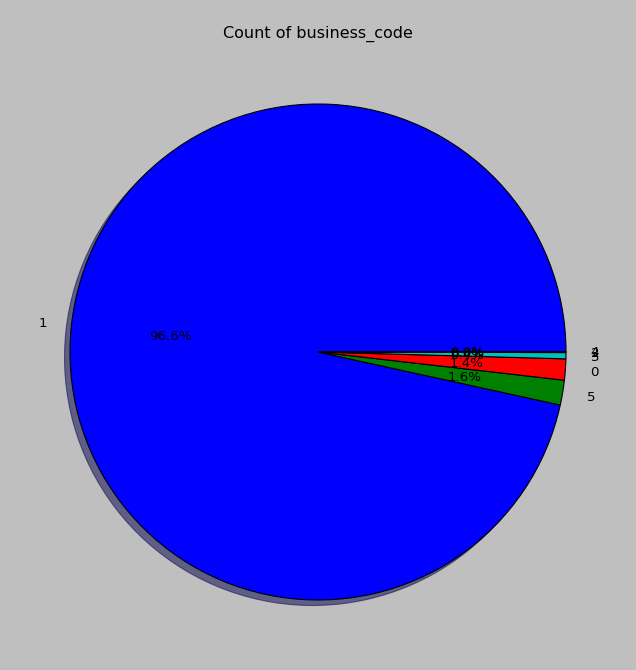

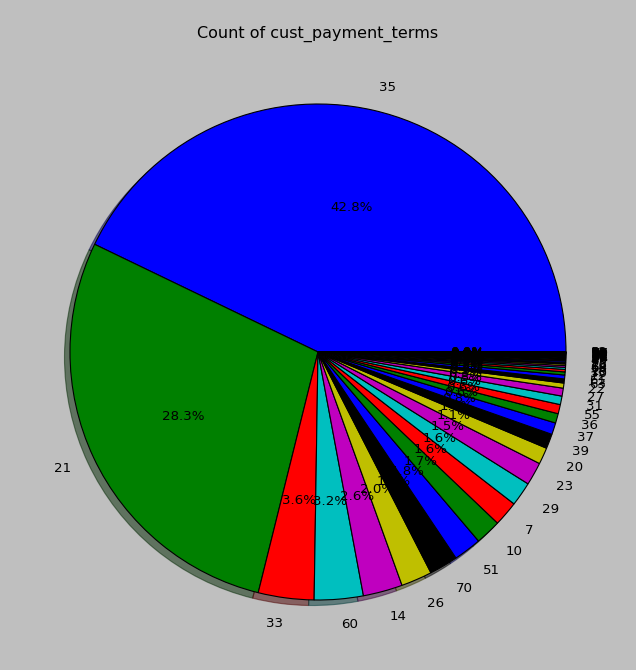

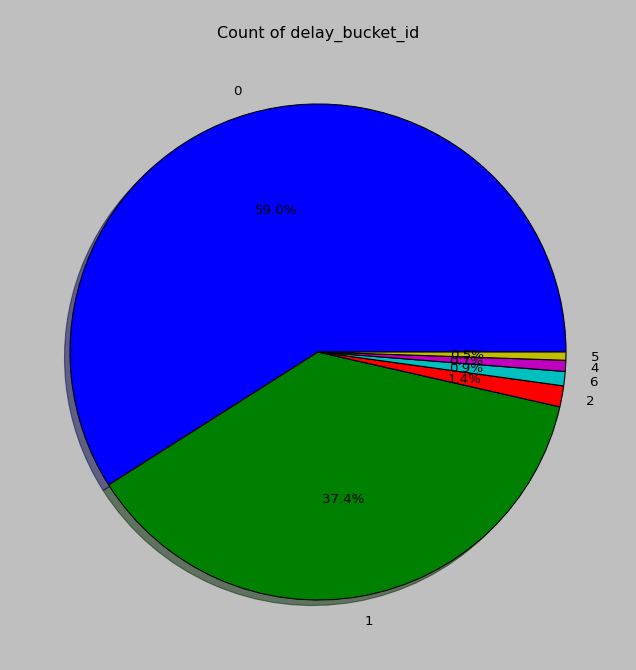

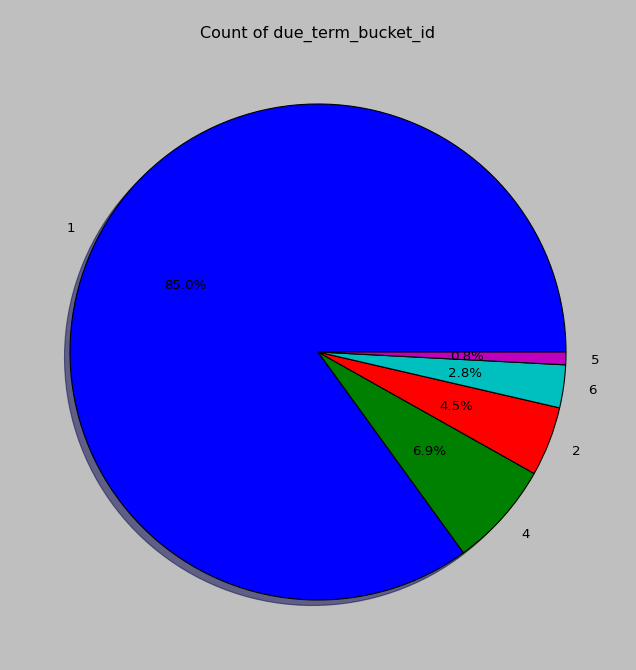

In [288]:
for col in ['business_code','cust_payment_terms', 'delay_bucket_id','due_term_bucket_id']:
    plt.style.use('classic')
    fig,ax = plt.subplots(figsize=(10,10))
    plt.pie(data[col].value_counts(),labels=data[col].unique(),shadow=True,autopct='%1.1f%%')
    plt.title('\nCount of {}'.format(col))
    plt.show()

BAR PLOT

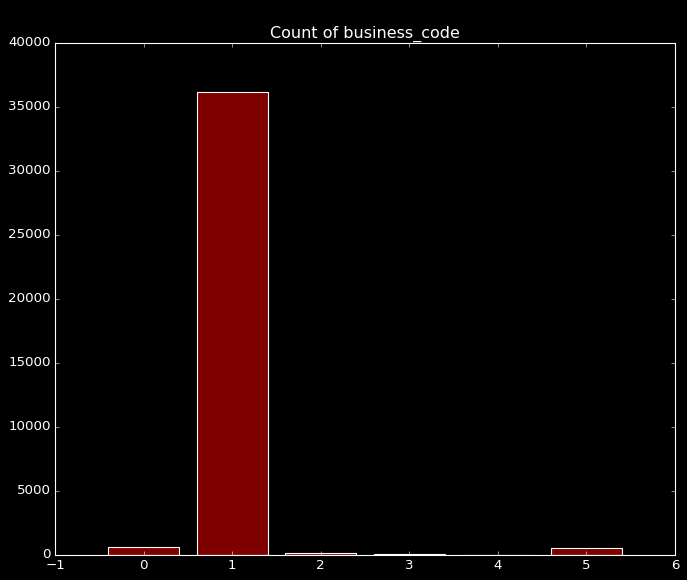

<Figure size 1600x1600 with 0 Axes>

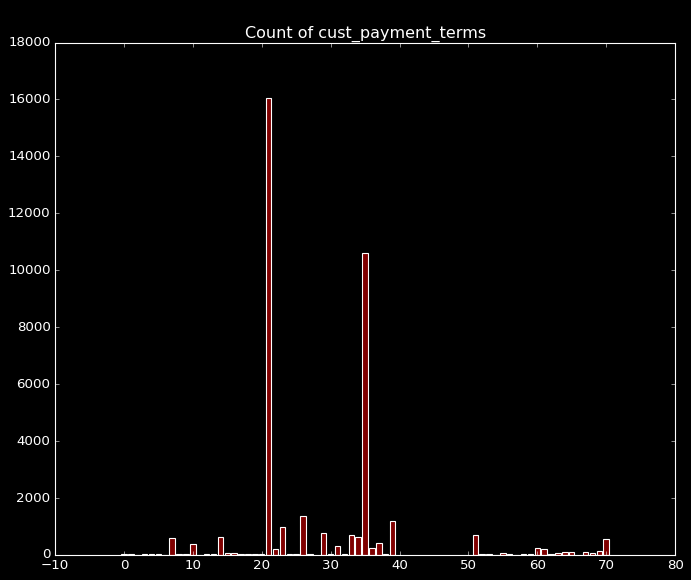

<Figure size 1600x1600 with 0 Axes>

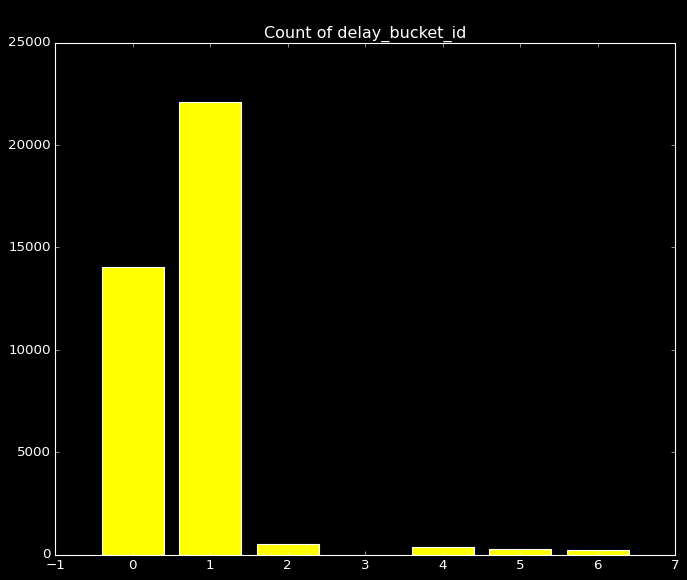

<Figure size 1600x1600 with 0 Axes>

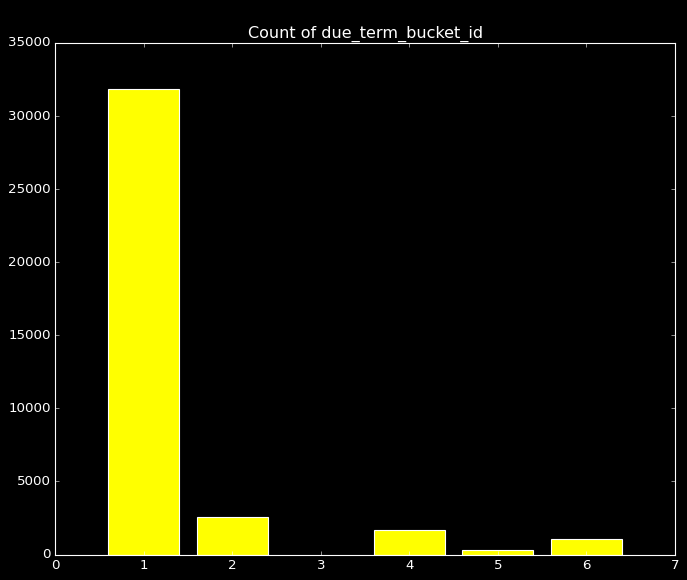

<Figure size 1600x1600 with 0 Axes>

In [289]:
features = ['business_code','cust_payment_terms', 'delay_bucket_id','due_term_bucket_id']

for col in features:
    plt.style.use('dark_background')
    fig,ax = plt.subplots(figsize=(10,8))
    plt.bar(list(data[col].value_counts().index),list(data[col].value_counts()),color = random.sample(['maroon','yellow'],1))            
    plt.title('\nCount of {}'.format(col))
    plt.figure(figsize=(20,20))
    plt.show()

BOX PLOT

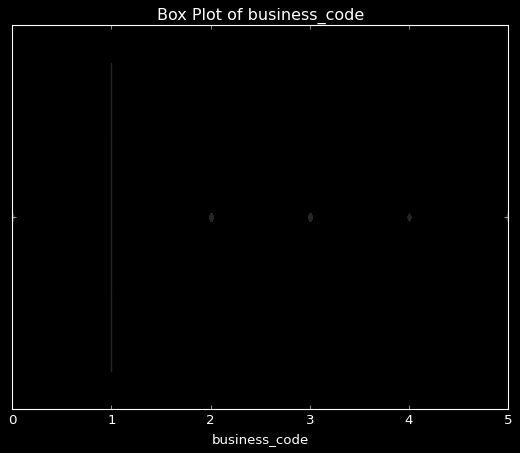

<Figure size 1600x1600 with 0 Axes>

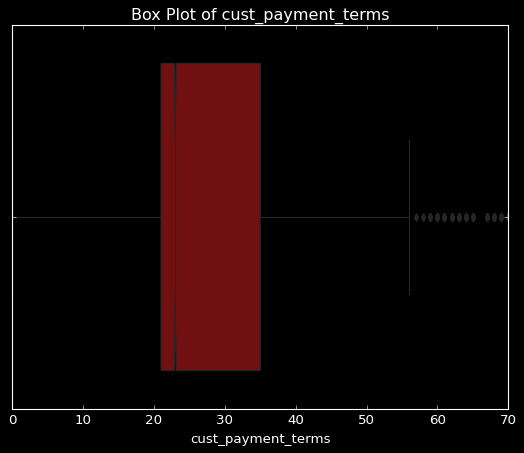

<Figure size 1600x1600 with 0 Axes>

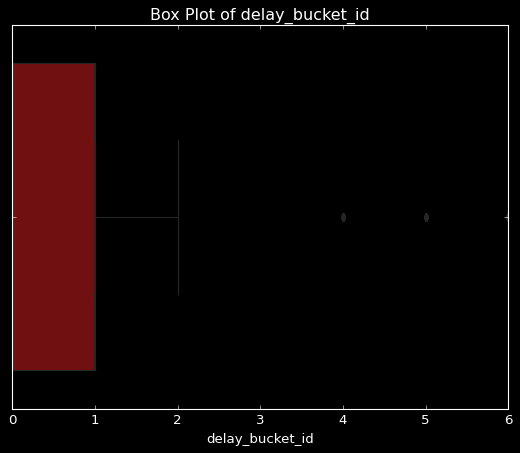

<Figure size 1600x1600 with 0 Axes>

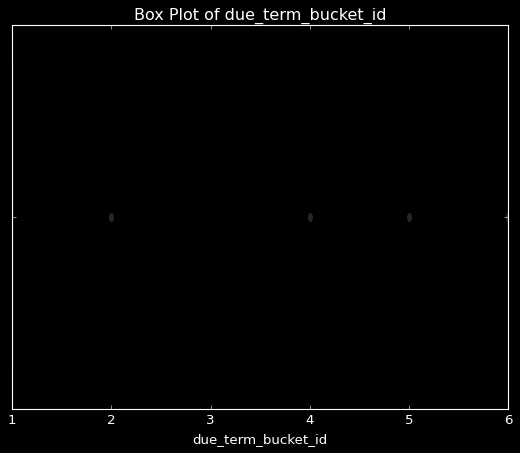

<Figure size 1600x1600 with 0 Axes>

In [290]:
features = ['business_code','cust_payment_terms', 'delay_bucket_id','due_term_bucket_id']

for col in features:
    plt.style.use('dark_background')
    seaborn.boxplot(data[col],color='maroon',notch=True)
    plt.title('Box Plot of {}'.format(col))
    plt.figure(figsize=(20,20))
    plt.show()

Scatter Plot

In [291]:
data.columns

Index(['business_code', 'cust_number', 'clear_date', 'due_in_date',
       'total_open_amount', 'baseline_create_date', 'cust_payment_terms',
       'payment_term', 'due_term', 'delay', 'DELAY BUCKET(DAYS)',
       'DUE TERM BUCKET(DAYS)', 'delay_bucket_id', 'due_term_bucket_id',
       'baseline_create_date.day', 'baseline_create_date.year',
       'baseline_create_date.month', 'due_in_date.day', 'due_in_date.year',
       'due_in_date.month', 'Sum_base_amount', 'Sum_due_term',
       'mean_base_amount', 'mean_due_term', 'amount/mean_amount',
       'amount-/mean_amount', 'due_term/amount', 'mean_due_term/amount',
       'mean_due_term/Sum_base_amount', 'cust_count', 'cust_count/mean_amount',
       'cust_count*due_term/amount'],
      dtype='object')

Scatter Plot

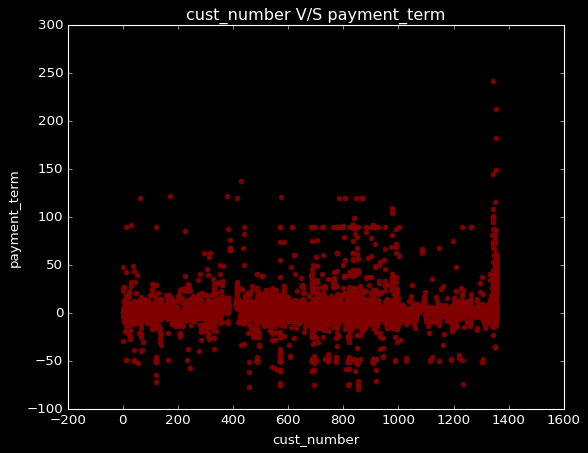

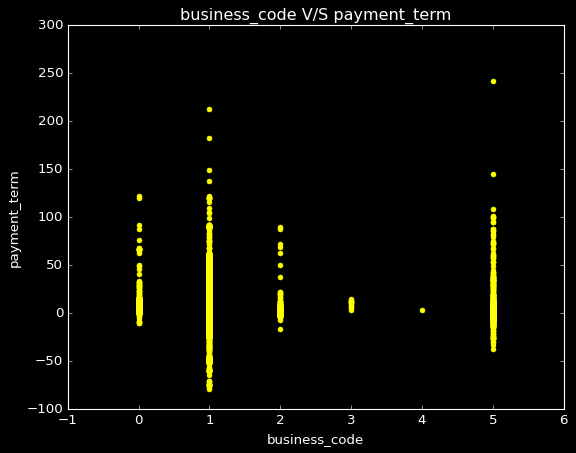

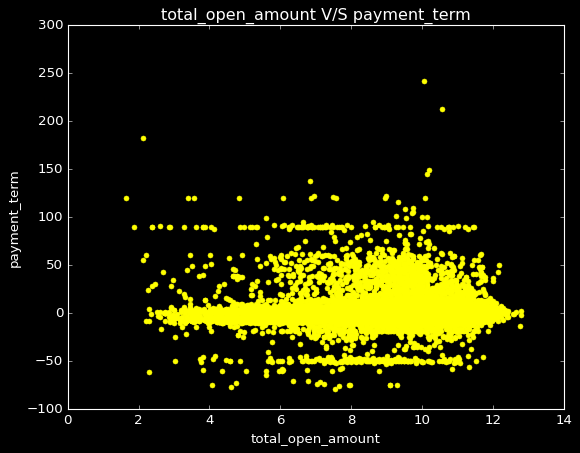

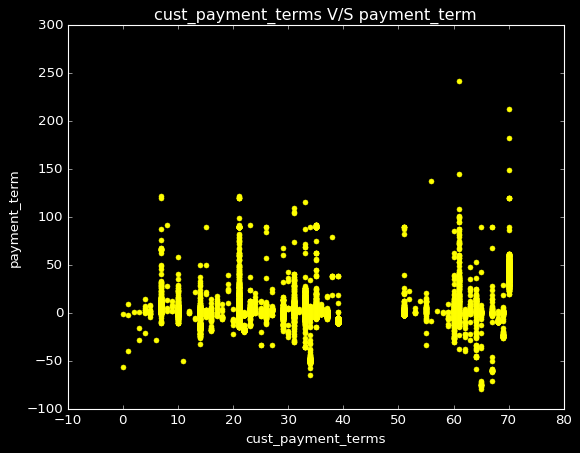

In [292]:
x_val = ['cust_number','business_code', 'total_open_amount', 'cust_payment_terms']
y_val = 'payment_term'
for col in x_val:
    plt.scatter(data[col],data['delay'],color=random.sample(['yellow','maroon'],1),linewidth = .5)
    plt.title('{} V/S {}'.format(col,y_val))
    plt.xlabel(col)
    plt.ylabel(y_val)
    plt.show()

In [293]:
data.nunique()

business_code                        6
cust_number                       1225
clear_date                         393
due_in_date                        489
total_open_amount                33226
baseline_create_date               420
cust_payment_terms                  58
payment_term                       150
due_term                            30
delay                              169
DELAY BUCKET(DAYS)                   6
DUE TERM BUCKET(DAYS)                5
delay_bucket_id                      6
due_term_bucket_id                   5
baseline_create_date.day            31
baseline_create_date.year            3
baseline_create_date.month          12
due_in_date.day                     31
due_in_date.year                     3
due_in_date.month                   12
Sum_base_amount                   1220
Sum_due_term                       279
mean_base_amount                  1220
mean_due_term                      222
amount/mean_amount               33262
amount-/mean_amount      

DISTRIBUTION PLOTS

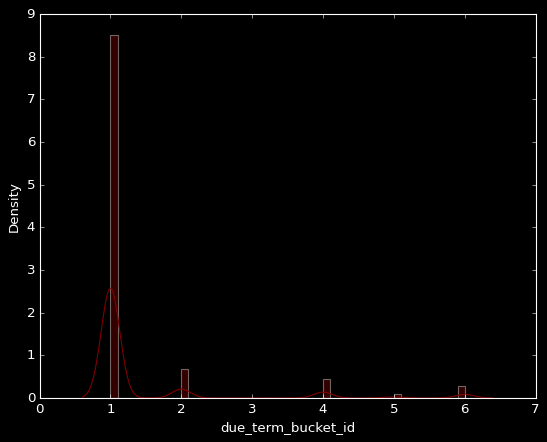

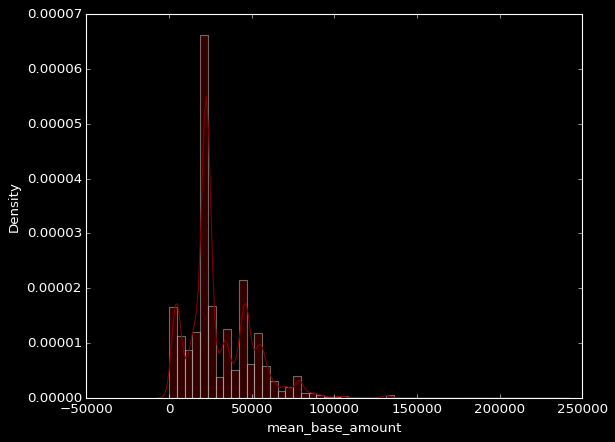

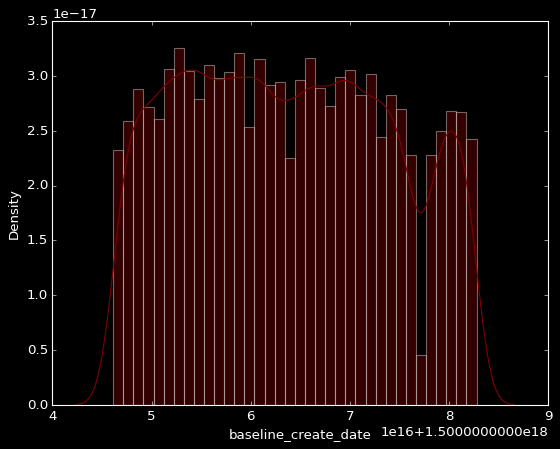

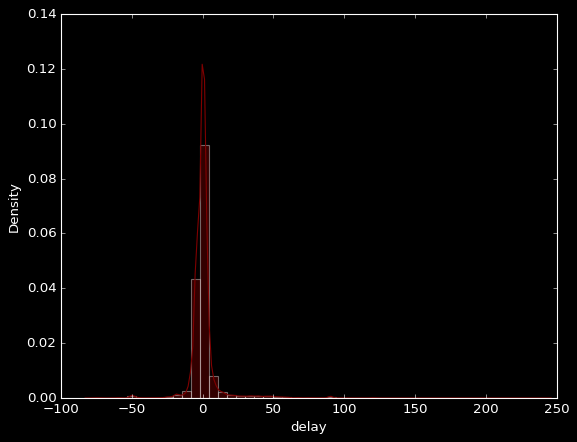

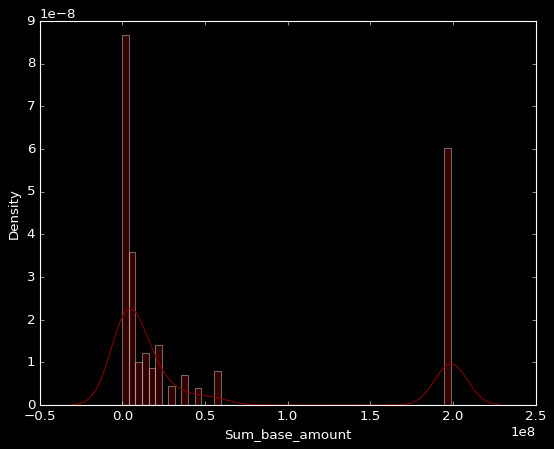

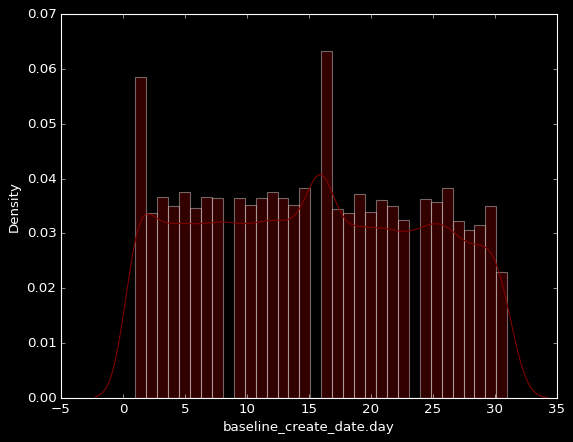

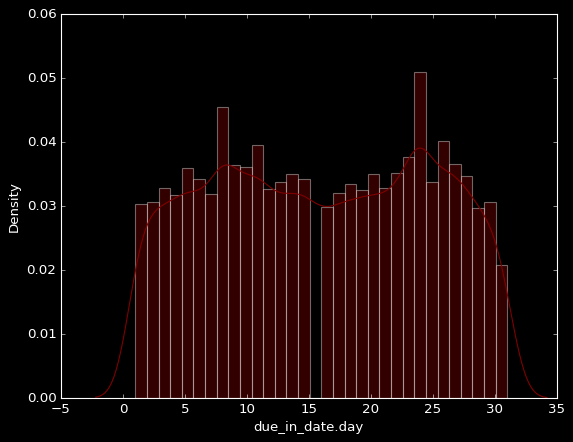

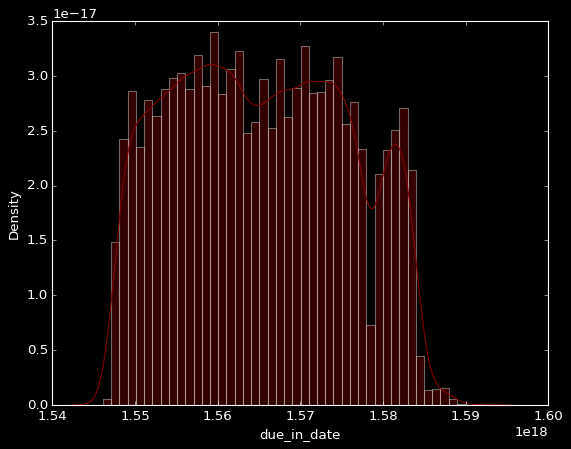

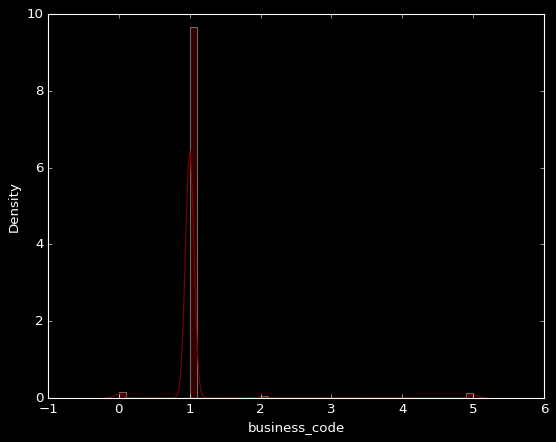

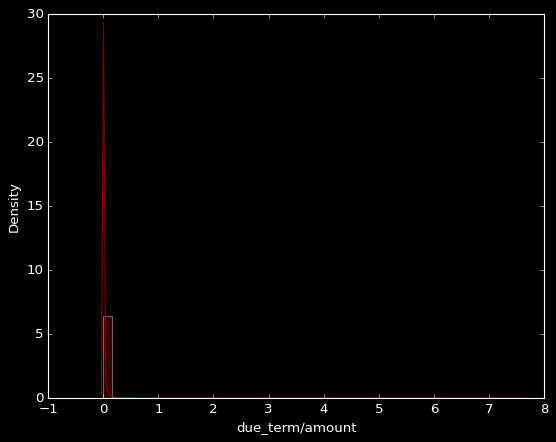

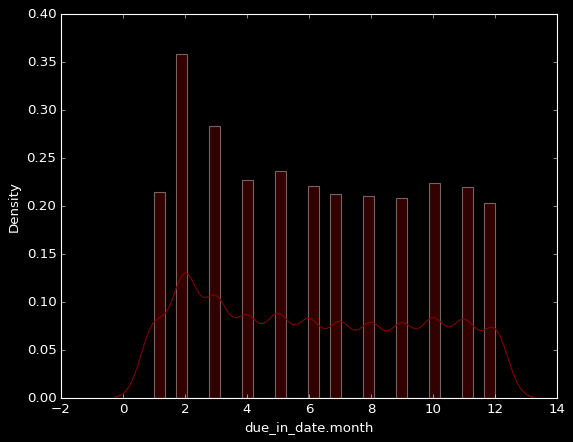

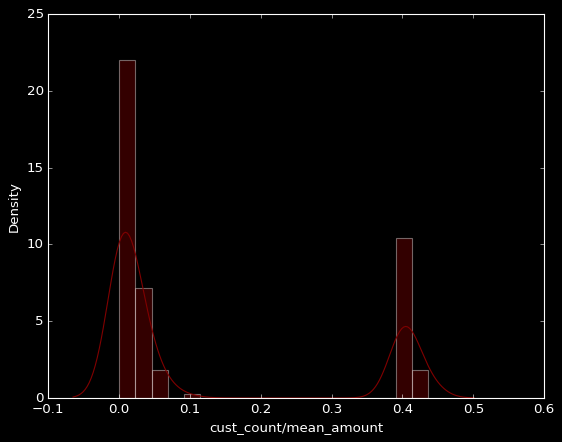

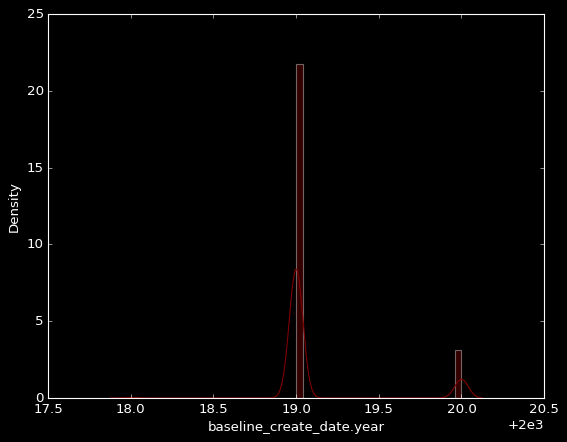

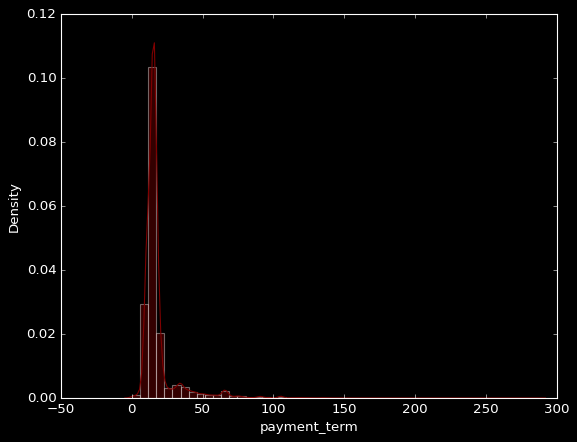

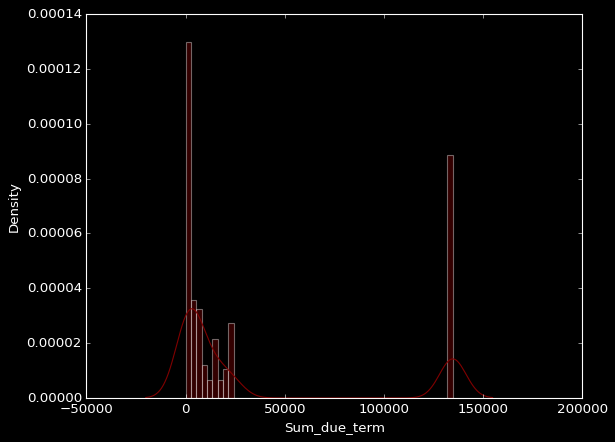

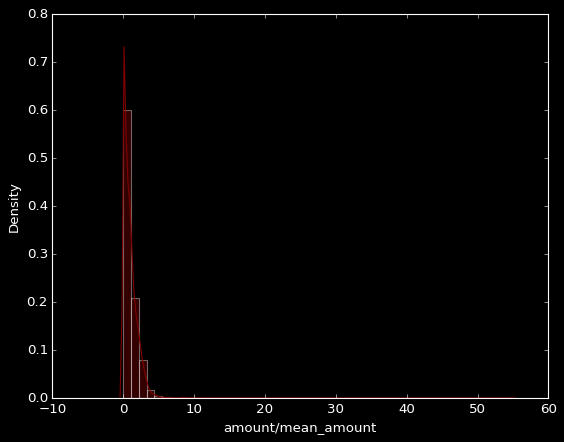

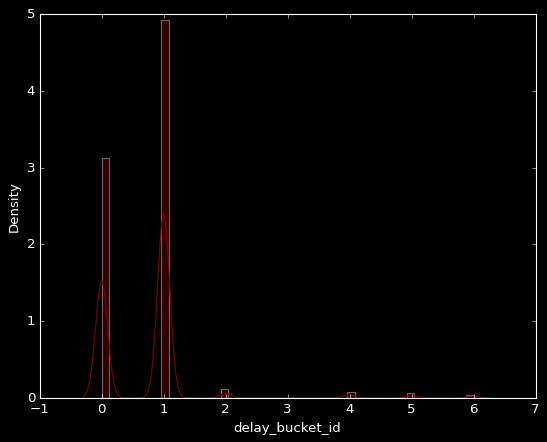

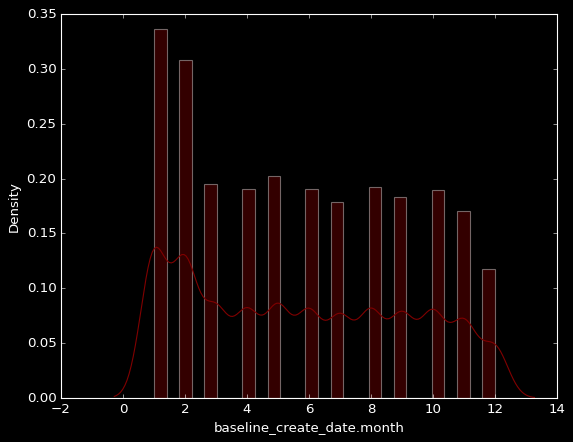

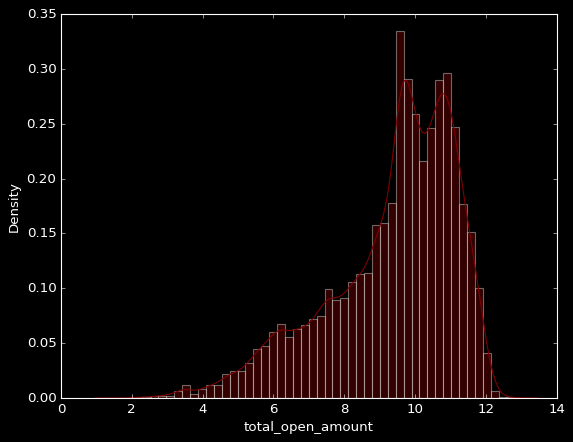

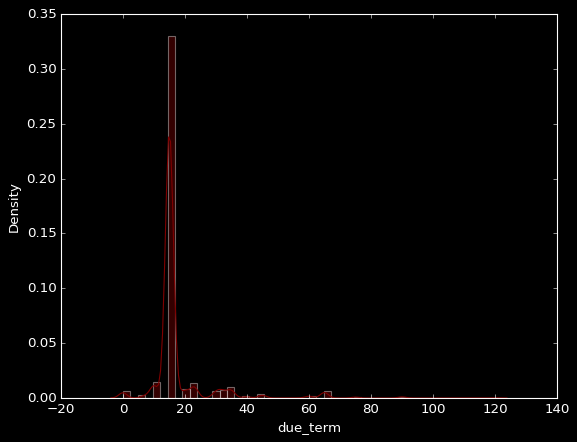

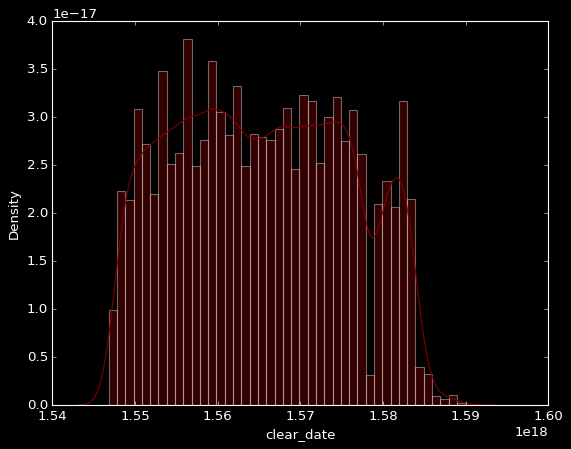

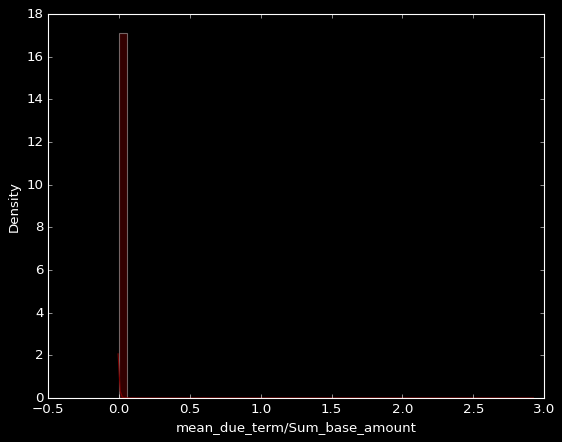

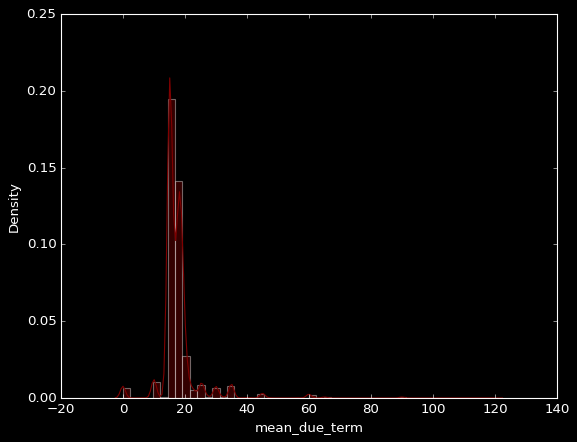

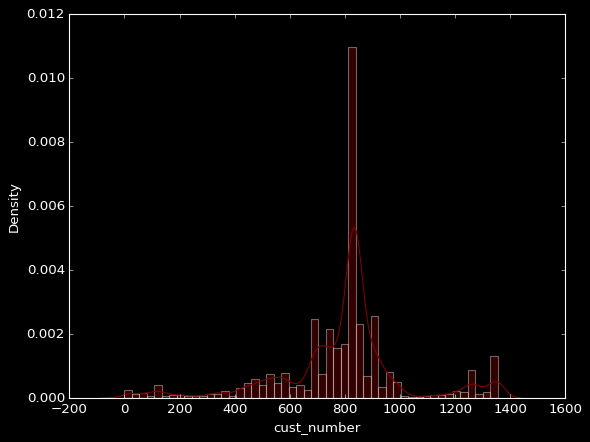

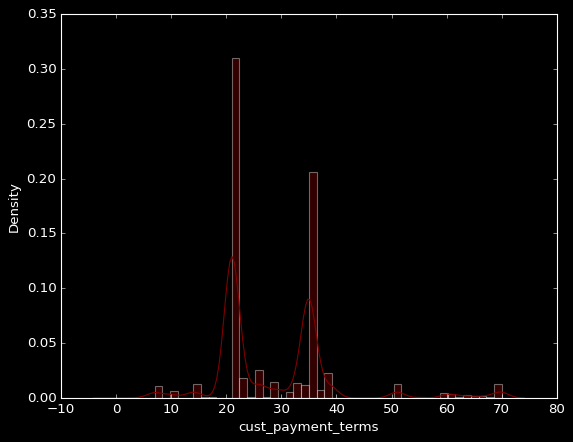

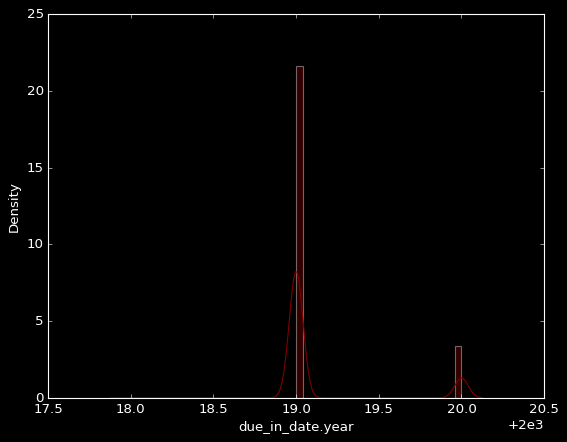

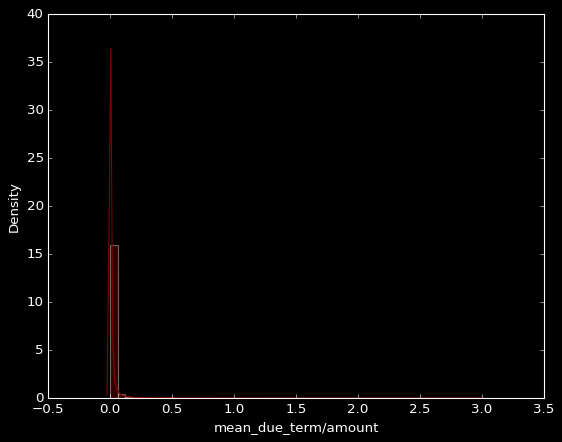

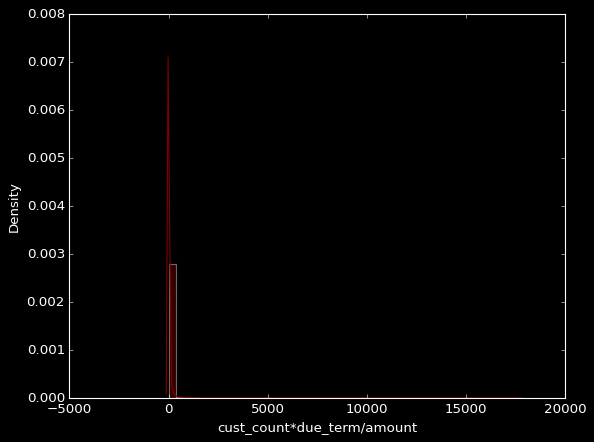

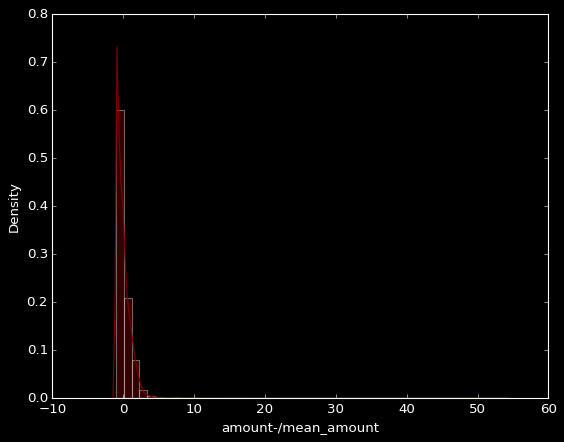

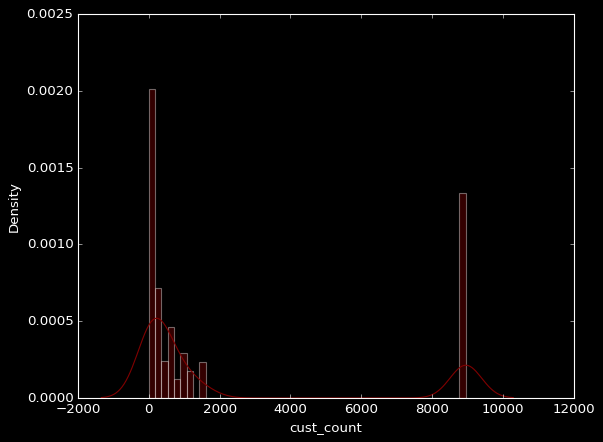

In [294]:
for col in list(set(data.columns) - set(['DELAY BUCKET(DAYS)' ,'DUE TERM BUCKET(DAYS)'])):
    seaborn.distplot(data[col],color='maroon')
    plt.show()

In [295]:
data_copy = data.copy()
test_dataset_copy = test_dataset.copy()

OUTLIER DETECTION AND REMOVAL

clear_date-due_in_date(Payment term) > 100

15 > total_open_amount > 1

-45 < delay <50

custumer_num >50

In [296]:
data.describe()

,business_code,cust_number,total_open_amount,cust_payment_terms,payment_term,due_term,delay,delay_bucket_id,due_term_bucket_id,baseline_create_date.day,...,mean_base_amount,mean_due_term,amount/mean_amount,amount-/mean_amount,due_term/amount,mean_due_term/amount,mean_due_term/Sum_base_amount,cust_count,cust_count/mean_amount,cust_count*due_term/amount
count,37440.000000,37440.000000,37440.000000,37440.000000,37440.000000,37440.000000,37440.000000,37440.000000,37440.000000,37440.000000,...,37440.000000,37440.000000,37440.000000,3.744000e+04,37440.000000,37440.000000,3.744000e+04,37440.000000,37440.000000,37440.000000
mean,1.043670,792.142041,9.344903,28.685203,18.408761,17.757292,0.651469,0.722596,1.377324,15.365812,...,30652.193770,17.757292,1.000000,-1.292034e-15,0.015289,0.013435,2.427980e-04,2437.840705,0.125139,34.788985
std,0.489904,236.175301,1.801313,11.236897,13.419076,10.677148,10.707444,0.802066,1.079056,8.834579,...,20287.356661,6.728825,1.217240,1.217240e+00,0.092233,0.068470,1.696716e-02,3670.156688,0.177499,316.390465
min,0.000000,0.000000,1.637053,0.000000,0.000000,0.000000,-79.000000,0.000000,1.000000,1.000000,...,5.140000,0.000000,0.000098,-9.999022e-01,0.000000,0.000000,0.000000e+00,1.000000,0.000004,0.000000
25%,1.000000,705.000000,8.364033,21.000000,13.000000,15.000000,-3.000000,0.000000,1.000000,8.000000,...,21712.520000,15.048045,0.230131,-7.698691e-01,0.000328,0.000355,7.568776e-08,85.000000,0.002533,0.049607
50%,1.000000,836.000000,9.730318,23.000000,15.000000,15.000000,0.000000,1.000000,1.000000,16.000000,...,22484.068855,16.530612,0.713837,-2.861634e-01,0.000917,0.000980,1.573835e-06,398.000000,0.022957,0.486285
75%,1.000000,852.000000,10.713850,35.000000,17.000000,15.000000,2.000000,1.000000,1.000000,23.000000,...,45820.352628,18.601266,1.420930,4.209303e-01,0.004001,0.003966,8.843581e-06,1564.000000,0.402895,5.107544
max,5.000000,1354.000000,12.799141,70.000000,287.000000,120.000000,242.000000,6.000000,6.000000,31.000000,...,234689.300000,120.000000,54.857733,5.385773e+01,7.645260,2.991027,2.918288e+00,8950.000000,0.436599,17696.490361


In [297]:
pay_max = 80
data[data['payment_term']>=pay_max]['payment_term'].value_counts().sum()

340

In [298]:
data = data[(data['total_open_amount'] > 1) & (data['payment_term']<=pay_max )].reset_index(drop=True)

In [299]:
data.shape

(37108, 32)

In [300]:
test_dataset.shape

(10000, 29)

Distribution after removing outliers

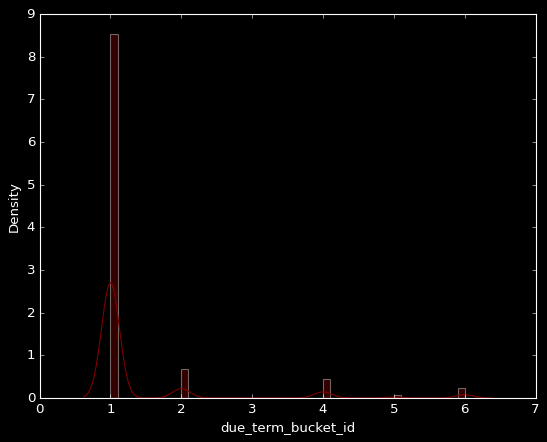

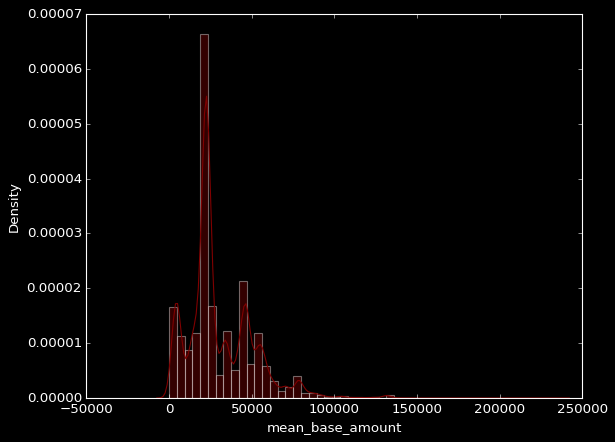

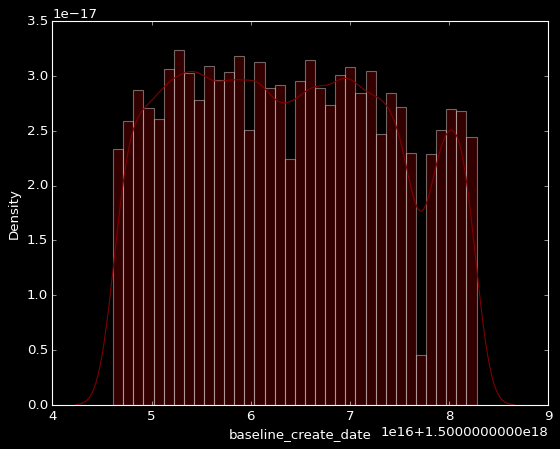

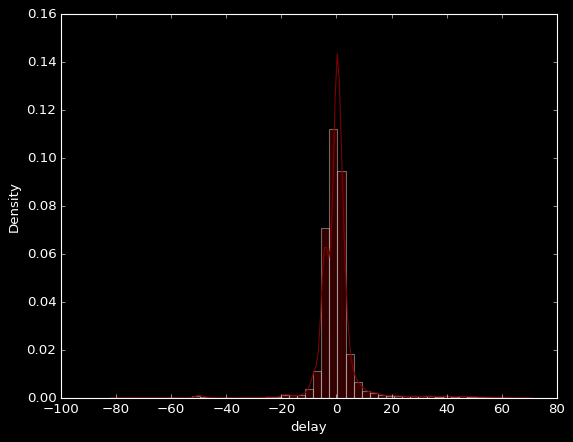

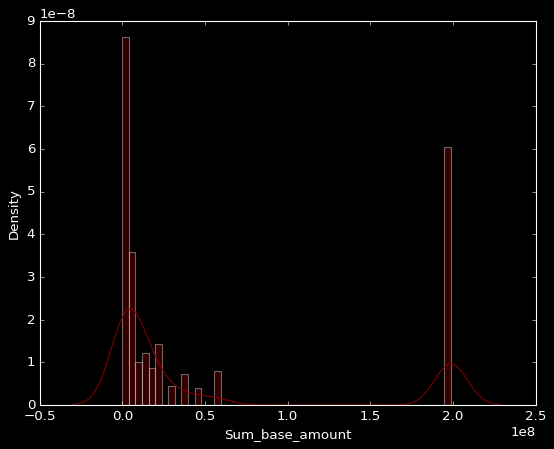

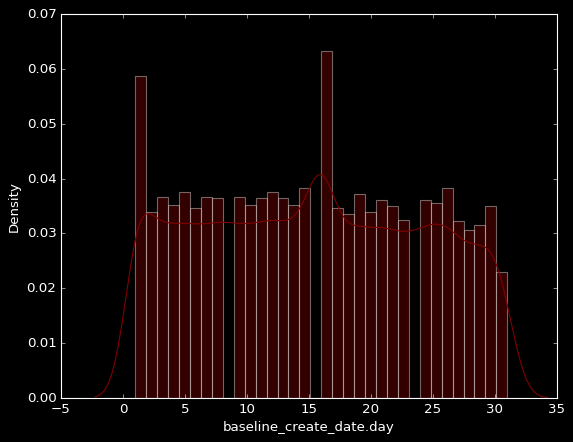

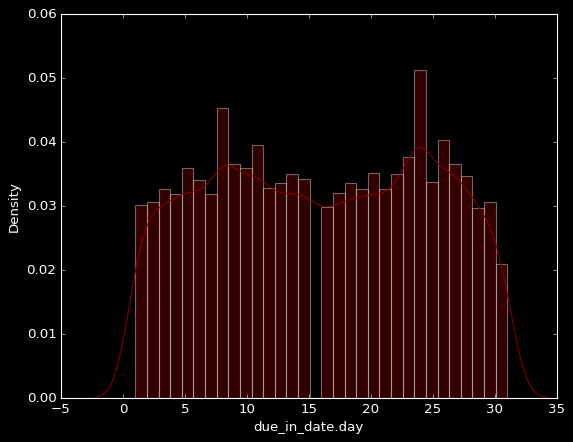

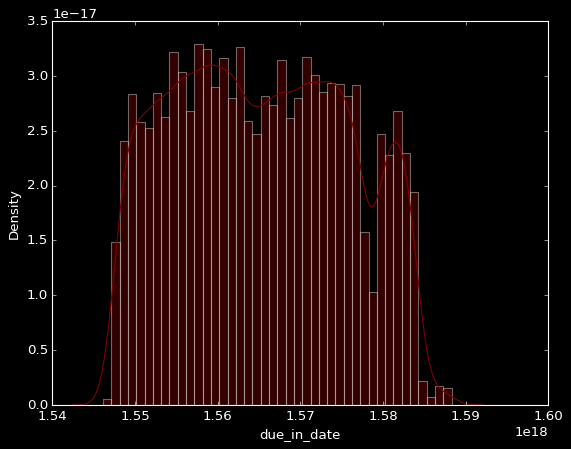

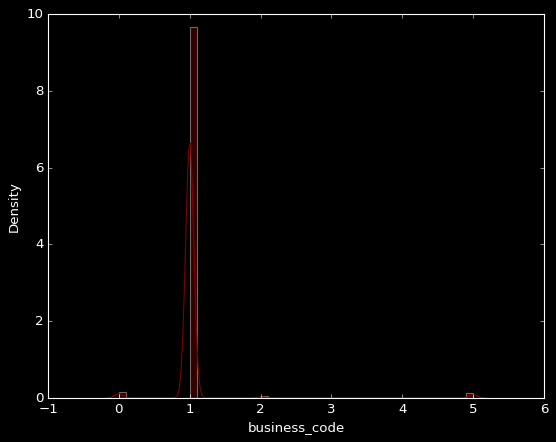

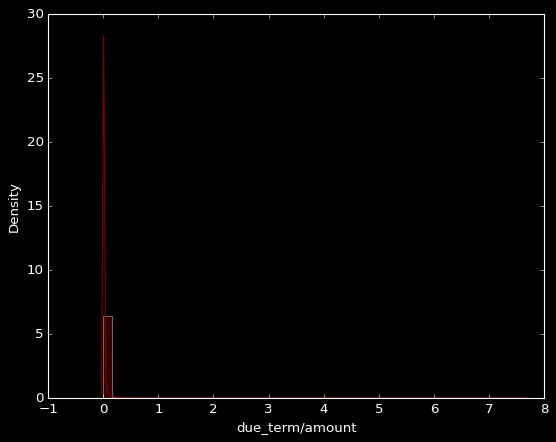

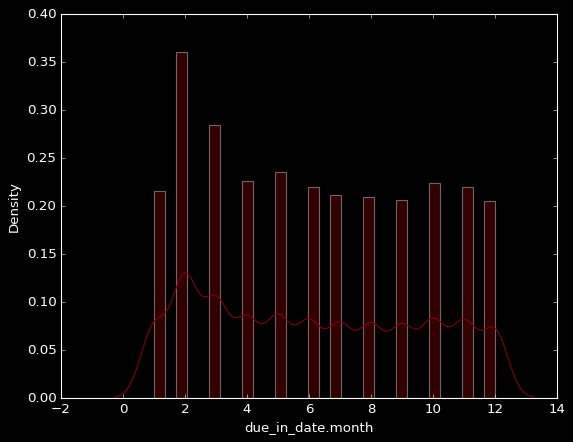

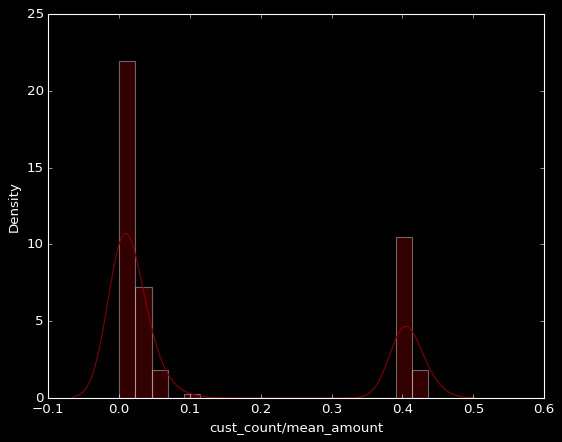

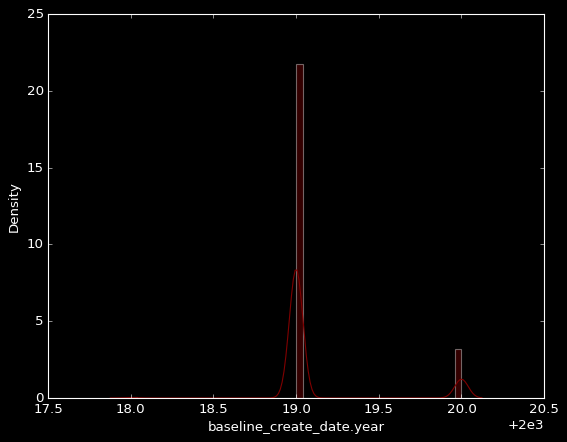

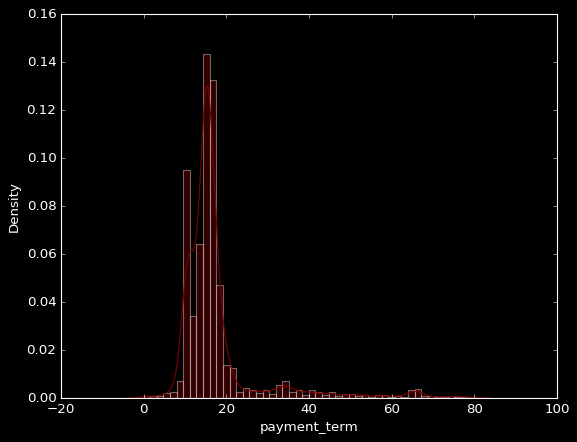

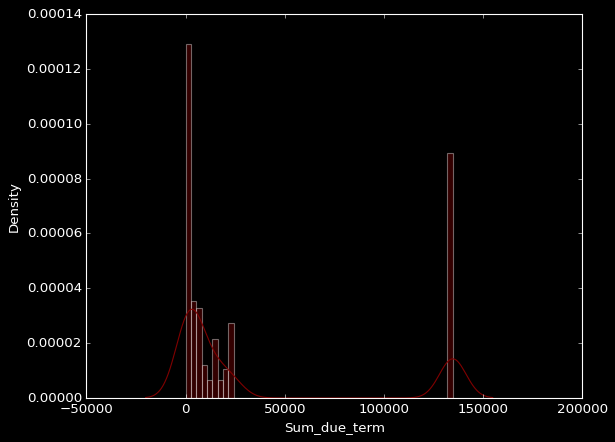

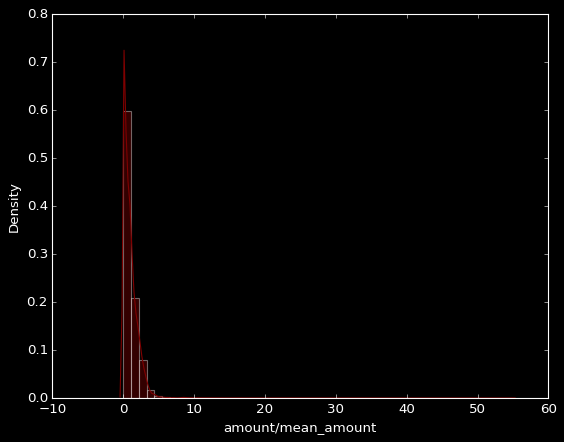

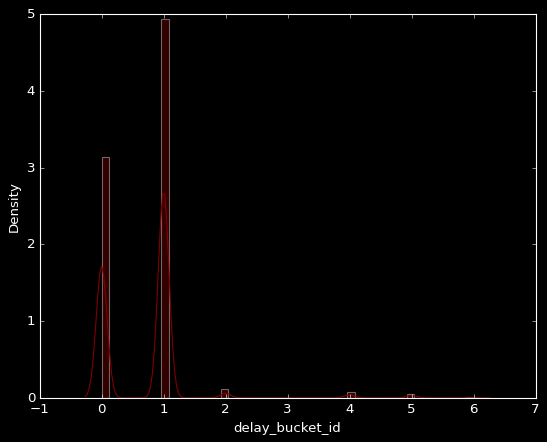

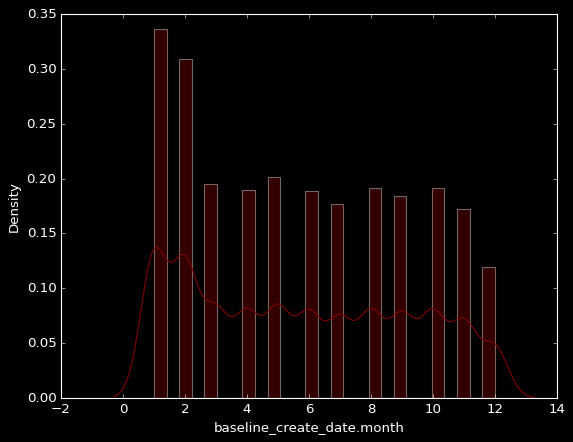

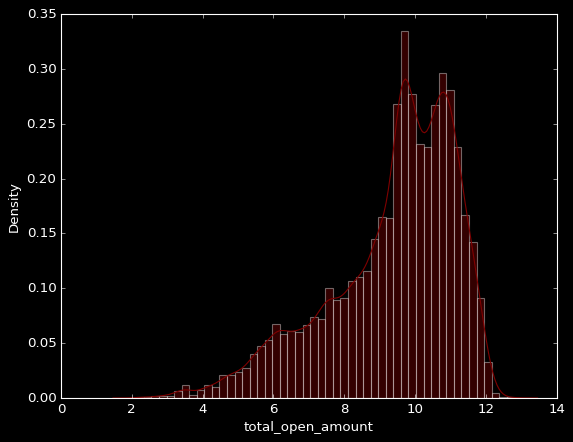

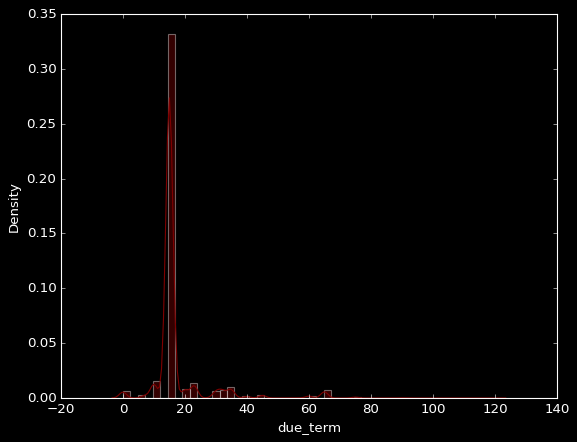

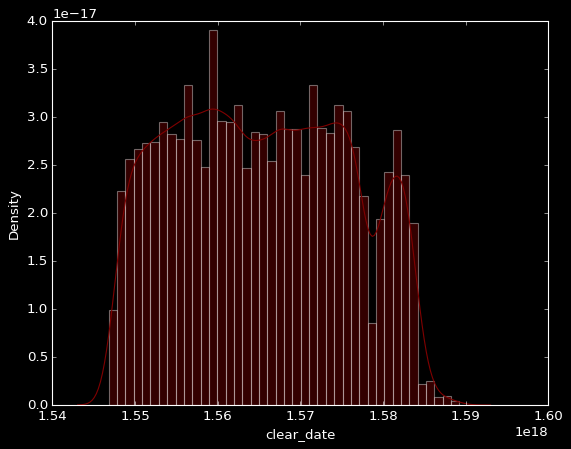

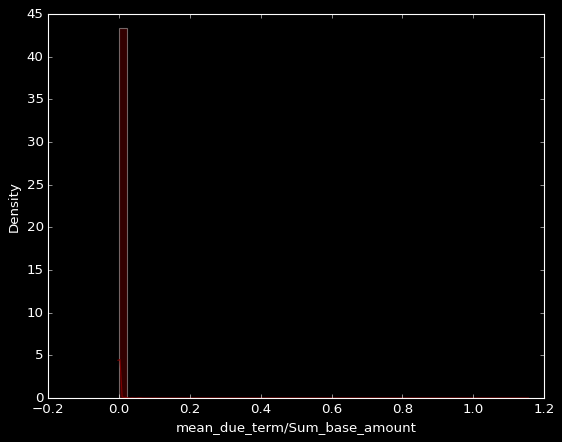

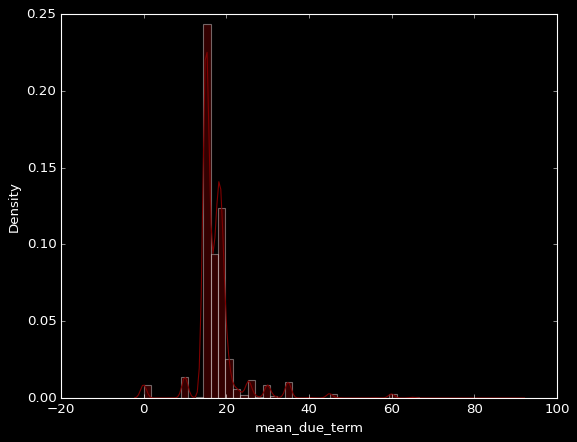

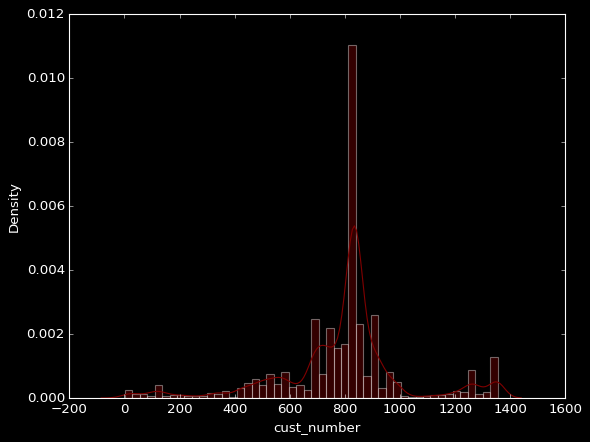

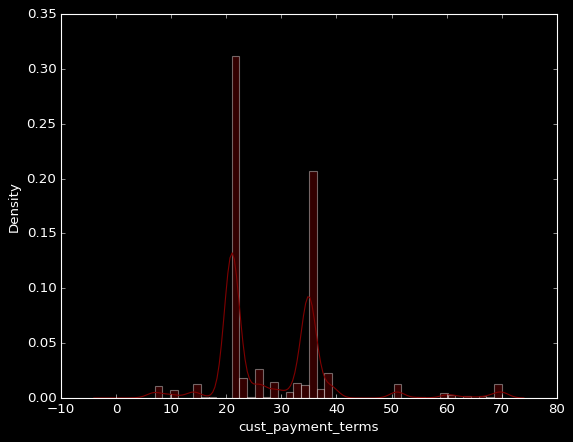

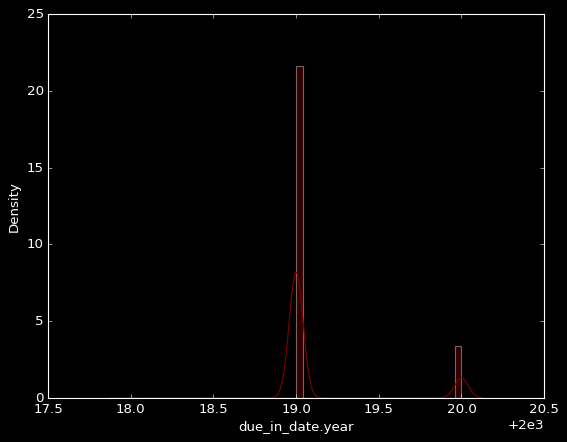

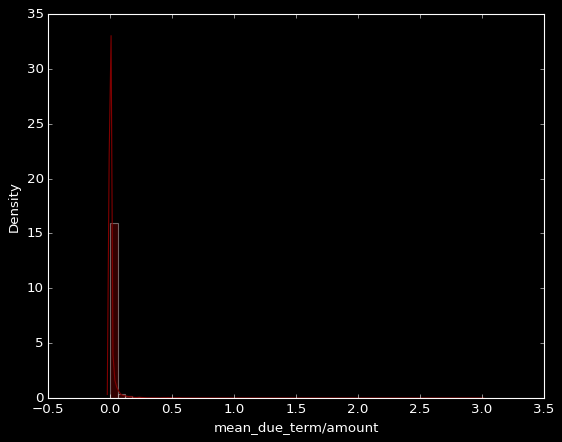

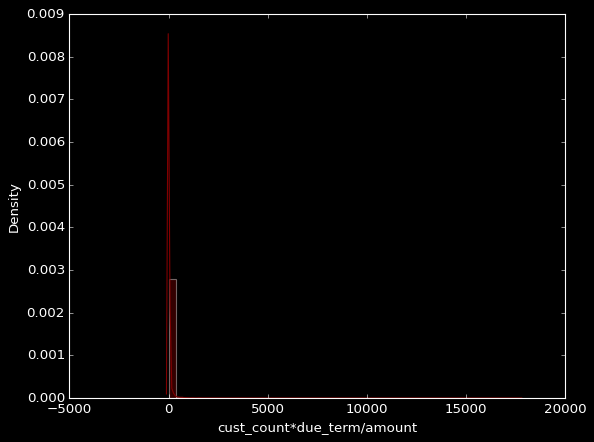

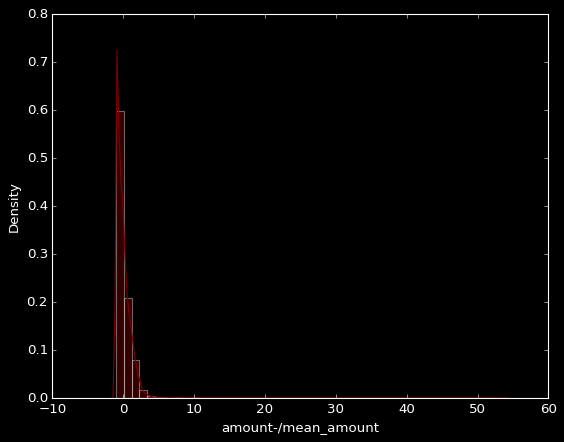

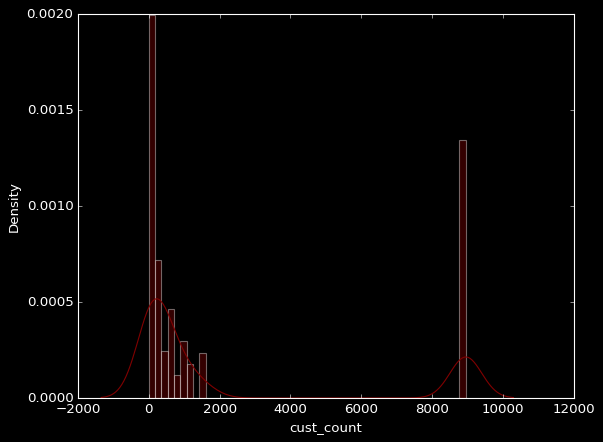

In [301]:
for col in list(set(data.columns) - set(['DELAY BUCKET(DAYS)' ,'DUE TERM BUCKET(DAYS)'])):
    seaborn.distplot(data[col],color='maroon')
    plt.show()

Diffrent Features

In [302]:
print(list(data.columns))
print("\n\n",len(list(data.columns)))

['business_code', 'cust_number', 'clear_date', 'due_in_date', 'total_open_amount', 'baseline_create_date', 'cust_payment_terms', 'payment_term', 'due_term', 'delay', 'DELAY BUCKET(DAYS)', 'DUE TERM BUCKET(DAYS)', 'delay_bucket_id', 'due_term_bucket_id', 'baseline_create_date.day', 'baseline_create_date.year', 'baseline_create_date.month', 'due_in_date.day', 'due_in_date.year', 'due_in_date.month', 'Sum_base_amount', 'Sum_due_term', 'mean_base_amount', 'mean_due_term', 'amount/mean_amount', 'amount-/mean_amount', 'due_term/amount', 'mean_due_term/amount', 'mean_due_term/Sum_base_amount', 'cust_count', 'cust_count/mean_amount', 'cust_count*due_term/amount']


 32


In [303]:
categorical_features = ['business_code', 'cust_payment_terms','due_term_bucket_id']

In [304]:
numerical_features = list(set(set(data.columns) - set(['DELAY BUCKET(DAYS)', 'DUE TERM BUCKET(DAYS)', 'delay_bucket_id', 'due_term_bucket_id','clear_date', 'due_in_date', 'baseline_create_date'])) - set(categorical_features))

In [305]:
len(numerical_features)

23

In [306]:
len(categorical_features)

3

Scaling the Numerical features

In [307]:
infos_df = data[['clear_date', 'due_in_date', 'baseline_create_date','total_open_amount']]

In [308]:
train_num = data[list(set(numerical_features)   -  set(['payment_term','delay']))]
test_num = test_dataset[list(set(numerical_features)   -  set(['payment_term','delay']))]
train_cat = data[categorical_features]
test_cat = test_dataset[list(set(categorical_features))]

In [309]:
scaler = MinMaxScaler()
y_scaler = MinMaxScaler()
final_train_n = pd.DataFrame(scaler.fit_transform(train_num[list(set(numerical_features)-set(['payment_term','delay']))]),columns=list(set(numerical_features)-set(['payment_term','delay'])))
final_test_n = pd.DataFrame(scaler.fit_transform(test_num),columns=list(set(numerical_features)-set(['payment_term','delay'])))
data['delay'] = y_scaler.fit_transform(np.array(data['delay']).reshape(data['delay'].shape[0],1))

In [310]:
num_cols = final_train_n.columns

In [311]:
final_train_n=pd.merge(final_train_n,data['cust_number'],left_index=True,right_index=True)
final_test_n=pd.merge(final_test_n,test_dataset['cust_number'],left_index=True,right_index=True)

In [312]:
final_test_n=pd.merge(final_test_n,infos_df.drop(columns = ['clear_date']),left_index=True,right_index=True)

In [313]:
final_train_n=pd.merge(final_train_n,infos_df,left_index=True,right_index=True)

In [314]:
final_test_n.shape

(10000, 25)

In [315]:
final_train_n.shape

(37108, 26)

One-Hot Encoding the Categorical Data

In [316]:
data_cat=pd.concat((train_cat,test_cat),sort=False).reset_index(drop=True)
data_cat

,business_code,cust_payment_terms,due_term_bucket_id
0,1,35,1
1,1,35,1
2,1,35,1
3,1,35,1
4,1,35,1
...,...,...,...
47103,1,71,1
47104,0,9,1
47105,0,9,1
47106,0,9,1


In [317]:
data_cat1 = pd.get_dummies(data_cat,prefix='enc_c_',columns = ['business_code'],drop_first=False)
data_cat2 = pd.get_dummies(data_cat,prefix='enc_c___',columns = ['cust_payment_terms'],drop_first=False)
data_cat1 = pd.merge(data_cat1,data_cat2,left_index=True,right_index=True)
data_cat2 = pd.get_dummies(data_cat,prefix='enc_c',columns = ['due_term_bucket_id'],drop_first=False)
data_cat1 = pd.merge(data_cat1,data_cat2,left_index=True,right_index=True)

data_cat1 = data_cat1.drop(columns =['cust_payment_terms_x', 'due_term_bucket_id_x','due_term_bucket_id_y','business_code_y','cust_payment_terms_y','business_code_x']) 

In [318]:
data[['business_code','cust_payment_terms','due_term_bucket_id']].nunique().sum()

67

In [319]:
data_cat1.columns

Index(['enc_c__0', 'enc_c__1', 'enc_c__2', 'enc_c__3', 'enc_c__4', 'enc_c__5',
       'enc_c____0', 'enc_c____1', 'enc_c____3', 'enc_c____4', 'enc_c____5',
       'enc_c____6', 'enc_c____7', 'enc_c____8', 'enc_c____9', 'enc_c____10',
       'enc_c____11', 'enc_c____12', 'enc_c____13', 'enc_c____14',
       'enc_c____15', 'enc_c____16', 'enc_c____17', 'enc_c____18',
       'enc_c____19', 'enc_c____20', 'enc_c____21', 'enc_c____22',
       'enc_c____23', 'enc_c____24', 'enc_c____25', 'enc_c____26',
       'enc_c____27', 'enc_c____29', 'enc_c____30', 'enc_c____31',
       'enc_c____32', 'enc_c____33', 'enc_c____34', 'enc_c____35',
       'enc_c____36', 'enc_c____37', 'enc_c____38', 'enc_c____39',
       'enc_c____51', 'enc_c____52', 'enc_c____53', 'enc_c____54',
       'enc_c____55', 'enc_c____57', 'enc_c____58', 'enc_c____59',
       'enc_c____60', 'enc_c____61', 'enc_c____62', 'enc_c____63',
       'enc_c____64', 'enc_c____65', 'enc_c____67', 'enc_c____68',
       'enc_c____69', 'enc_c_

In [320]:
final_train_c = data_cat1[:data.shape[0]].reset_index(drop=True)
final_test_c = data_cat1[data.shape[0]:].reset_index(drop=True)

In [321]:
#final_train_c = train_cat
#final_test_c = test_cat

In [322]:
final_train_c.shape

(37108, 68)

In [323]:
final_test_c.shape

(10000, 68)

Merging the Numerical, Categorical and Numerical-Categorical Data

In [324]:
test_data = final_test_n.merge(final_test_c.reset_index(drop=True),left_index=True,right_index=True)
#test_data = test_data.merge(final_test_c.reset_index(drop=True),left_index=True,right_index=True)
test_data

,Sum_due_term,amount/mean_amount,mean_base_amount,baseline_create_date.month,total_open_amount_x,due_term,mean_due_term/Sum_base_amount,Sum_base_amount,mean_due_term,cust_number_x,...,enc_c____67,enc_c____68,enc_c____69,enc_c____70,enc_c____71,enc_c_1,enc_c_2,enc_c_4,enc_c_5,enc_c_6
0,0.001523,7.484760e-04,0.011663,0.00,0.292620,0.230769,0.003780,0.000141,0.230769,0.590842,...,0,0,0,0,0,1,0,0,0,0
1,0.001523,2.104395e-02,0.232729,0.00,0.778451,0.230769,0.000202,0.002674,0.230769,0.964549,...,0,0,0,0,0,1,0,0,0,0
2,0.135135,2.065847e-02,0.192670,0.25,0.762423,0.230769,0.000004,0.163521,0.277705,0.598966,...,0,0,0,0,0,1,0,0,0,0
3,0.000761,2.873308e-02,0.263508,0.25,0.812206,0.461538,0.001428,0.000755,0.461538,0.213442,...,0,0,0,0,0,0,1,0,0,0
4,0.002411,3.858222e-02,0.270239,0.25,0.837016,0.230769,0.000122,0.004657,0.243590,0.547267,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.000000,7.754565e-02,0.028060,1.00,0.717481,0.000000,0.000000,0.000329,0.000000,0.420975,...,0,0,0,0,1,1,0,0,0,0
9996,0.000000,3.807006e-02,0.016564,1.00,0.586366,0.000000,0.000000,0.000197,0.000000,0.065731,...,0,0,0,0,0,1,0,0,0,0
9997,0.000000,1.484659e-02,0.016564,1.00,0.513336,0.000000,0.000000,0.000197,0.000000,0.065731,...,0,0,0,0,0,1,0,0,0,0
9998,0.000000,1.484659e-02,0.016564,1.00,0.513336,0.000000,0.000000,0.000197,0.000000,0.065731,...,0,0,0,0,0,1,0,0,0,0


In [325]:
train_data = final_train_n.merge(final_train_c.reset_index(drop=True),left_index=True,right_index=True)
train_data = train_data.merge(data['delay'].reset_index(drop=True),left_index=True,right_index=True)
train_data

,Sum_due_term,amount/mean_amount,mean_base_amount,baseline_create_date.month,total_open_amount_x,due_term,mean_due_term/Sum_base_amount,Sum_base_amount,mean_due_term,cust_number_x,...,enc_c____68,enc_c____69,enc_c____70,enc_c____71,enc_c_1,enc_c_2,enc_c_4,enc_c_5,enc_c_6,delay
0,1.000000,0.003906,0.094587,1.000000,0.594194,0.125000,6.562129e-08,1.000000,0.167200,0.617147,...,0,0,0,0,1,0,0,0,0,0.503401
1,1.000000,0.037473,0.094587,1.000000,0.806020,0.125000,6.562129e-08,1.000000,0.167200,0.617147,...,0,0,0,0,1,0,0,0,0,0.510204
2,1.000000,0.007288,0.094587,1.000000,0.652611,0.125000,6.562129e-08,1.000000,0.167200,0.617147,...,0,0,0,0,1,0,0,0,0,0.503401
3,1.000000,0.007462,0.094587,1.000000,0.654819,0.125000,6.562129e-08,1.000000,0.167200,0.617147,...,0,0,0,0,1,0,0,0,0,0.503401
4,1.000000,0.008923,0.094587,1.000000,0.671568,0.125000,6.562129e-08,1.000000,0.167200,0.617147,...,0,0,0,0,1,0,0,0,0,0.503401
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37103,0.001262,0.019447,0.157304,0.090909,0.792200,0.125000,3.298211e-05,0.002043,0.171717,0.577236,...,0,0,0,0,1,0,0,0,0,0.557823
37104,0.148500,0.034611,0.143978,0.090909,0.837921,0.125000,4.573812e-07,0.180061,0.209842,0.599409,...,0,0,0,0,1,0,0,0,0,0.537415
37105,0.000446,0.021001,0.286286,0.090909,0.855500,0.083333,2.150274e-05,0.002028,0.111111,0.532890,...,0,0,0,0,1,0,0,0,0,0.564626
37106,0.011865,0.003254,0.059948,0.090909,0.534419,0.166667,1.241779e-05,0.006305,0.199501,0.636364,...,0,0,0,0,0,1,0,0,0,0.544218


In [326]:
set(train_data.columns) - set(test_data.columns)

{'clear_date', 'delay'}

GENERATING THE TEST-TRAIN-EVALUATION DATA

In [327]:
train_data = train_data.copy()
data_copy = data.copy()

In [400]:
x_data = train_data[set(train_data.columns) - set(['delay'])]
x_data.shape

(37108, 94)

In [403]:
x_test = test_data[set(test_data.columns) - set(['delay'])]
x_test.shape

(10000, 93)

In [402]:
y_data = train_data['delay']
y_data.shape

(37108,)

In [331]:
eval_range = (math.ceil(data.shape[0]*(0.25)))+1
x_train,x_eval,y_train,y_eval = x_data[eval_range:].reset_index(drop=True),x_data[0:eval_range].reset_index(drop=True),y_data[eval_range:].reset_index(drop=True),y_data[0:eval_range].reset_index(drop=True) 

In [332]:
eval_range = (math.ceil(x_eval.shape[0]*(0.4)))+1
x_eval1,x_eval2,y_eval1,y_eval2 = x_eval[eval_range:].reset_index(drop=True),x_eval[0:eval_range].reset_index(drop=True),y_eval[eval_range:].reset_index(drop=True),y_eval[0:eval_range].reset_index(drop=True)

In [333]:
x_eval1.columns

Index(['enc_c____22', 'enc_c____58', 'enc_c____55', 'cust_number_x',
       'baseline_create_date', 'enc_c____16', 'enc_c_6', 'enc_c_5',
       'enc_c____15', 'enc_c____32', 'enc_c_2', 'due_in_date', 'enc_c____6',
       'due_term/amount', 'due_in_date.month', 'enc_c____17', 'enc_c____27',
       'enc_c____70', 'enc_c____18', 'enc_c____23', 'amount/mean_amount',
       'enc_c____65', 'enc_c____36', 'enc_c____39', 'enc_c____60',
       'enc_c____9', 'enc_c____33', 'enc_c____71', 'enc_c____19',
       'baseline_create_date.month', 'enc_c____25',
       'mean_due_term/Sum_base_amount', 'enc_c____30', 'enc_c_1',
       'mean_due_term', 'enc_c____52', 'enc_c____62', 'enc_c____31',
       'mean_due_term/amount', 'cust_count*due_term/amount', 'cust_count',
       'enc_c____57', 'enc_c____20', 'enc_c____61', 'enc_c__4', 'enc_c____35',
       'mean_base_amount', 'enc_c____1', 'enc_c____51', 'enc_c__2',
       'total_open_amount_y', 'enc_c____10', 'enc_c____59', 'enc_c____54',
       'enc_c____7

In [334]:
x_train_info = x_train[['clear_date','total_open_amount_y','cust_number_y','baseline_create_date','due_in_date']]
x_eval1_info = x_eval1[['clear_date','total_open_amount_y','cust_number_y','baseline_create_date','due_in_date']]
x_eval2_info = x_eval2[['clear_date','total_open_amount_y','cust_number_y','baseline_create_date','due_in_date']]
x_test_info = x_test[['total_open_amount_y','cust_number_y','baseline_create_date','due_in_date']]

x_train = x_train.drop(columns=['clear_date','baseline_create_date','due_in_date'])
x_eval1 = x_eval1.drop(columns=['clear_date','baseline_create_date','due_in_date'])
x_eval2 = x_eval2.drop(columns=['clear_date','baseline_create_date','due_in_date'])
x_test = x_test.drop(columns=['baseline_create_date','due_in_date'])

In [335]:
x_train.shape,y_train.shape

((27830, 91), (27830,))

In [336]:
x_eval1.shape,y_eval1.shape

((5565, 91), (5565,))

In [337]:
x_eval2.shape,y_eval2.shape

((3713, 91), (3713,))

In [338]:
x_test.shape

(10000, 91)

In [339]:
#y_scaler.inverse_transform(np.array(y_eval).reshape(y_eval.shape[0],1))

In [340]:
#To write the final created dataset to the working directory
x_train.to_csv('x_train.csv')
x_test.to_csv('x_test.csv')
y_train.to_csv('y_train.csv')

x_eval1.to_csv('x_eval1.csv')
x_eval2.to_csv('x_eval2.csv')
y_eval1.to_csv('y_eval1.csv')
y_eval2.to_csv('y_eval2.csv')

FEATURE SELECTION

In [341]:
gc.collect()

36682

In [342]:
def select_features(x_train,y_train,x_test,x_eval1,x_eval2):
    fs = SelectKBest(score_func = f_regression,k=10)
    fs.fit(x_train,y_train)
    col_indices = fs.get_support(indices=True)
    x_features = x_train.columns[col_indices]
    x_train_fs = pd.DataFrame(fs.transform(x_train),columns=x_features)
    x_test_fs = pd.DataFrame(fs.transform(x_test),columns=x_features)
    x_eval1_fs = pd.DataFrame(fs.transform(x_eval1),columns=x_features)
    x_eval2_fs = pd.DataFrame(fs.transform(x_eval2),columns=x_features)
    return x_train_fs,x_test_fs,x_eval1_fs,x_eval2_fs,fs,x_features,col_indices

In [343]:
#x_train_fs,x_test_fs,x_eval1_fs,x_eval2_fs,fs,x_features,col_indices = select_features(x_train,y_train,x_test,x_eval1,x_eval2)

In [344]:
#for i in range(len(fs.scores_[col_indices])):
#    print("\n",x_features[i],"    ",fs.scores_[col_indices][i])

In [345]:
#selected_features = list(set(train_data.corr()['delay'][train_data.corr()['delay']>0.5].index) - set(['delay']) )
#selected_features

MODEL TRAINING , PREDICTION AND EVALUATION

In [346]:
x_train.columns

Index(['enc_c____22', 'enc_c____58', 'enc_c____55', 'cust_number_x',
       'enc_c____16', 'enc_c_6', 'enc_c_5', 'enc_c____15', 'enc_c____32',
       'enc_c_2', 'enc_c____6', 'due_term/amount', 'due_in_date.month',
       'enc_c____17', 'enc_c____27', 'enc_c____70', 'enc_c____18',
       'enc_c____23', 'amount/mean_amount', 'enc_c____65', 'enc_c____36',
       'enc_c____39', 'enc_c____60', 'enc_c____9', 'enc_c____33',
       'enc_c____71', 'enc_c____19', 'baseline_create_date.month',
       'enc_c____25', 'mean_due_term/Sum_base_amount', 'enc_c____30',
       'enc_c_1', 'mean_due_term', 'enc_c____52', 'enc_c____62', 'enc_c____31',
       'mean_due_term/amount', 'cust_count*due_term/amount', 'cust_count',
       'enc_c____57', 'enc_c____20', 'enc_c____61', 'enc_c__4', 'enc_c____35',
       'mean_base_amount', 'enc_c____1', 'enc_c____51', 'enc_c__2',
       'total_open_amount_y', 'enc_c____10', 'enc_c____59', 'enc_c____54',
       'enc_c____7', 'Sum_base_amount', 'enc_c____5', 'enc_c____

In [347]:
def evaluate_metrics(x,y_true,y_pred,mod):
    mean_abs_error = mean_absolute_error(y_true,y_pred)
    mean_sq_error = mean_squared_error(y_true,y_pred)
    root_mean_sq_error = mean_squared_error(y_true,y_pred)**0.5
    r2_scr = r2_score(y_true,y_pred)
    median_abs_score = median_absolute_error(y_true,y_pred)
    explained_variance = explained_variance_score(y_true,y_pred)
    return mean_abs_error,mean_sq_error,root_mean_sq_error,r2_scr,median_abs_score,explained_variance  

In [348]:
data.corr()['payment_term']

business_code                    0.243289
cust_number                      0.115274
total_open_amount               -0.020478
cust_payment_terms               0.278075
payment_term                     1.000000
due_term                         0.629947
delay                            0.515938
delay_bucket_id                  0.528322
due_term_bucket_id               0.695088
baseline_create_date.day         0.006847
baseline_create_date.year        0.002014
baseline_create_date.month      -0.037970
due_in_date.day                 -0.016867
due_in_date.year                -0.006269
due_in_date.month                0.030342
Sum_base_amount                 -0.274265
Sum_due_term                    -0.277128
mean_base_amount                 0.048699
mean_due_term                    0.390155
amount/mean_amount              -0.053529
amount-/mean_amount             -0.053529
due_term/amount                  0.034006
mean_due_term/amount            -0.001205
mean_due_term/Sum_base_amount    0

In [349]:
regression_algo = ['1. LINEAR REGRESSION','2. RIDGE REGRESSION','3. LASSO REGRESSION','4. RANDOM FOREST REGRESSION','5. SUPPORT VECTOR REGRESSION(RBF)','6. DECISION TREE REGRESSION','7. XBF REGRESSION'] 

metric_names = ["MEAN ABSOLUTE ERROR","SCORE","MEAN SQUARED ERROR","ROOT MEAN SQUARED ERROR","R2 SCORE","MEDIAN ABSOLUTE ERROR","EXPLAINED VARIANCE SCORE"]

reg_metrics = []

1. LINEAR REGRESSION

In [350]:
gc.collect()

180

In [351]:
model1 = LinearRegression()
parameters = {'fit_intercept':[True,False],'n_jobs':[1,2,3],'normalize':[True,False]}
grid = GridSearchCV(estimator = model1,param_grid= parameters,scoring = 'neg_mean_squared_error',verbose = 1)     
grid_results = grid.fit(x_train,y_train)
print('BEST SCORE:  ',grid_results.best_score_)
print('BEST PARAMS:  ',grid_results.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
BEST SCORE:   -0.0017489188855129736
BEST PARAMS:   {'fit_intercept': False, 'n_jobs': 1, 'normalize': True}


In [352]:
model1 = LinearRegression(fit_intercept = grid_results.best_params_['fit_intercept'],n_jobs = grid_results.best_params_['n_jobs'])
model1.fit(x_train,y_train)
y_pred1 = model1.predict(x_eval1)
y_pred1 = y_pred1.reshape(y_pred1.shape[0])
y_eval1 = np.array(y_eval1)
y_predicted = y_scaler.inverse_transform(y_pred1.reshape(y_pred1.shape[0],1)).reshape(y_pred1.shape[0])
y_true = y_scaler.inverse_transform(y_eval1.reshape(y_eval1.shape[0],1)).reshape(y_eval1.shape[0])
mean_abs_error,mean_sq_error,root_mean_sq_error,r2_scr,median_abs_score,explained_variance = evaluate_metrics(x_eval1,y_eval1,y_pred1,model1)
scr = model1.score(x_eval1,y_eval1)
reg_metrics.append([mean_abs_error,scr,mean_sq_error,root_mean_sq_error,r2_scr,median_abs_score,explained_variance])

print("METRICS  :\n\nMean Absolute Error :  ",mean_abs_error,"\nScore :   ",scr,"\nMean Squared Error :  ",mean_sq_error,"\nRoot Mean Squared Error :  ",root_mean_sq_error,"\nR2 Square :  ",r2_scr,"\nMedian Absolute Score :  ",median_abs_score,"\nExplained Variance Score :  ",explained_variance)   

METRICS  :

Mean Absolute Error :   0.02481059641633891 
Score :    0.4574839260914684 
Mean Squared Error :   0.0022067572698972106 
Root Mean Squared Error :   0.04697613511025796 
R2 Square :   0.4574839260914684 
Median Absolute Score :   0.011344599726492266 
Explained Variance Score :   0.4586232099226185


In [353]:
reg_metrics

[[0.02481059641633891,
  0.4574839260914684,
  0.0022067572698972106,
  0.04697613511025796,
  0.4574839260914684,
  0.011344599726492266,
  0.4586232099226185]]

In [354]:
def plot_regression_line(x_test,y_test,y_pred):
    for col in x_test.columns:
        #plt.scatter(x_test[col],y_test,color='red')
        plt.plot(x_test[col],y_pred1,color='yellow',linewidth = 0.5)
        plt.xlim(-0.00000000000001,0.000000000000001)
        plt.xlabel(col)
        plt.ylabel('delay')
        plt.title('{} V/S {} Regression Line\n'.format(col,'delay'))
        plt.show()

In [355]:
#plot_regression_line(x_eval1,y_eval1,y_pred1)

2. REGULARIZATION AND EVALUATION : RIDGE REGRESSION

In [356]:
ridge = Ridge()
parameters = {'alpha':[x for x in [0.0005,0.0001,0.00021,0.0006,0.1,0.001,0.005,0.008,0.1,0.5,1,0.1,0.09,0.08,0.06,0.05,0.03,0.01,0.02,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]]}  

ridge_reg = GridSearchCV(ridge,param_grid = parameters,verbose=1)
ridge_reg = ridge_reg.fit(x_train,y_train)

alpha = ridge_reg.best_params_['alpha']

print("\n\nBest Alpha:  ",ridge_reg.best_params_,"\nScore:  ",ridge_reg.best_score_)

ridge_mod = Ridge(alpha=alpha)
ridge_mod=ridge_mod.fit(x_train,y_train)
y_pred1 = ridge_mod.predict(x_eval1)
y_pred2 = ridge_mod.predict(x_eval2)


mean_abs_error,mean_sq_error,root_mean_sq_error,r2_scr,median_abs_score,explained_variance = evaluate_metrics(x_eval1,y_eval1,y_pred1,ridge_mod)
scr = ridge_mod.score(x_eval1,y_eval1)
print("\n\n\nMETRICS  :\n\nMean Absolute Error :  ",mean_abs_error,"\nScore :   ",scr,"\nMean Squared Error :  ",mean_sq_error,"\nRoot Mean Squared Error :  ",root_mean_sq_error,"\nR2 Square :  ",r2_scr,"\nMedian Absolute Score :  ",median_abs_score,"\nExplained Variance Score :  ",explained_variance)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


Best Alpha:   {'alpha': 1} 
Score:   0.47549386784778724



METRICS  :

Mean Absolute Error :   0.02493288073704364 
Score :    0.4596888527909039 
Mean Squared Error :   0.002197788433290187 
Root Mean Squared Error :   0.046880576290081875 
R2 Square :   0.4596888527909039 
Median Absolute Score :   0.011707292931600777 
Explained Variance Score :   0.45989832886780946


In [357]:
reg_metrics.append([mean_abs_error,scr,mean_sq_error,root_mean_sq_error,r2_scr,median_abs_score,explained_variance])
reg_metrics

[[0.02481059641633891,
  0.4574839260914684,
  0.0022067572698972106,
  0.04697613511025796,
  0.4574839260914684,
  0.011344599726492266,
  0.4586232099226185],
 [0.02493288073704364,
  0.4596888527909039,
  0.002197788433290187,
  0.046880576290081875,
  0.4596888527909039,
  0.011707292931600777,
  0.45989832886780946]]

In [358]:
# hyper parameter tuninhg using the evaluation set

ridge_reg = GridSearchCV(ridge,param_grid = parameters,verbose=1)
ridge_reg = ridge_reg.fit(x_eval1,y_eval1)
alpha = ridge_reg.best_params_['alpha']

print("\n\nBest Alpha:  ",ridge_reg.best_params_,"\nScore:  ",ridge_reg.best_score_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


Best Alpha:   {'alpha': 0.2} 
Score:   0.4674574728885901


In [359]:
# For 2nd Evaluation set

mean_abs_error,mean_sq_error,root_mean_sq_error,r2_scr,median_abs_score,explained_variance = evaluate_metrics(x_eval2,y_eval2,y_pred2,ridge_mod)
scr = ridge_mod.score(x_eval2,y_eval2)
print("\n\n\nMETRICS  :\n\nMean Absolute Error :  ",mean_abs_error,"\nScore :   ",scr,"\nMean Squared Error :  ",mean_sq_error,"\nRoot Mean Squared Error :  ",root_mean_sq_error,"\nR2 Square :  ",r2_scr,"\nMedian Absolute Score :  ",median_abs_score,"\nExplained Variance Score :  ",explained_variance)    




METRICS  :

Mean Absolute Error :   0.019817032324500983 
Score :    0.6122257999461953 
Mean Squared Error :   0.0012755986007324434 
Root Mean Squared Error :   0.03571552324595628 
R2 Square :   0.6122257999461953 
Median Absolute Score :   0.011571063519629776 
Explained Variance Score :   0.6124177180161499


3. REGULARIZATION AND EVALUATION : LASSO REGRESSION

In [360]:
# Hyper Parameter tuning using the train data

lasso_reg = Lasso()
parameters = {'alpha':[x for x in [0.0005,0.0001,0.00021,0.0006,0.1,0.001,0.005,0.008,0.1,0.5,1]]}  
lasso_reg = GridSearchCV(lasso_reg,param_grid=parameters,verbose=1)
lasso_reg.fit(x_train,y_train)

print("\n\n\nBest Alpha : ",lasso_reg.best_params_,"\nBest Score : ",lasso_reg.best_score_)

lasso_reg = Lasso(alpha=0.0001)
lasso_reg = lasso_reg.fit(x_train,y_train)
y_pred1 = np.array(lasso_reg.predict(x_eval1))

mean_abs_error,mean_sq_error,root_mean_sq_error,r2_scr,median_abs_score,explained_variance = evaluate_metrics(x_eval1,y_eval1.reshape(y_eval1.shape[0],1),y_pred1.reshape(y_pred1.shape[0],1),ridge_mod)
scr = lasso_reg.score(x_eval1,y_eval1)
reg_metrics.append([mean_abs_error,scr,mean_sq_error,root_mean_sq_error,r2_scr,median_abs_score,explained_variance])

print("METRICS  :\n\nMean Absolute Error :  ",mean_abs_error,"\nScore :   ",scr,"\nMean Squared Error :  ",mean_sq_error,"\nRoot Mean Squared Error :  ",root_mean_sq_error,"\nR2 Square :  ",r2_scr,"\nMedian Absolute Score :  ",median_abs_score,"\nExplained Variance Score :  ",explained_variance)

Fitting 5 folds for each of 11 candidates, totalling 55 fits



Best Alpha :  {'alpha': 0.0001} 
Best Score :  0.5069271981414989
METRICS  :

Mean Absolute Error :   0.024906874906750448 
Score :    0.45414239761872743 
Mean Squared Error :   0.0022203493874480592 
Root Mean Squared Error :   0.04712058347949502 
R2 Square :   0.45414239761872743 
Median Absolute Score :   0.011744312144840618 
Explained Variance Score :   0.45487634789577713


In [361]:
# Hyper Parameter tuning using the 1st evaluation Data

parameters = {'alpha':[x for x in [0.0005,0.0002,0.0003,0.0004,0.009,0.0001,0.00021,0.0006,0.1,0.001,0.005,0.008,0.1,0.5,1]]}  
lasso_reg = GridSearchCV(lasso_reg,param_grid=parameters)
lasso_reg.fit(x_eval1,y_eval1)

print("\n\n\nBest Alpha : ",lasso_reg.best_params_,"\nBest Score : ",lasso_reg.best_score_)

lasso_reg = Lasso(alpha=0.0001)
lasso_reg = lasso_reg.fit(x_train,y_train)  




Best Alpha :  {'alpha': 0.0001} 
Best Score :  0.45948601995904054


In [362]:
## We still get the best value of alpha as : 0.0001.. So ther e is not much difference


# Evaluating on the 2nd Evaluation Data

y_pred2 = np.array(lasso_reg.predict(x_eval2))

mean_abs_error,mean_sq_error,root_mean_sq_error,r2_scr,median_abs_score,explained_variance = evaluate_metrics(x_eval2,np.array(y_eval2).reshape(np.array(y_eval2).shape[0],1),y_pred2.reshape(y_pred2.shape[0],1),ridge_mod)
scr = lasso_reg.score(x_eval2,y_eval2)
#reg_metrics.append([mean_abs_error,scr,mean_sq_error,root_mean_sq_error,r2_scr,median_abs_score,explained_variance])

print("\n\n1st Evaluation Data\n\nMETRICS  :\n\nMean Absolute Error :  ",mean_abs_error,"\nScore :   ",scr,"\nMean Squared Error :  ",mean_sq_error,"\nRoot Mean Squared Error :  ",root_mean_sq_error,"\nR2 Square :  ",r2_scr,"\nMedian Absolute Score :  ",median_abs_score,"\nExplained Variance Score :  ",explained_variance)   



1st Evaluation Data

METRICS  :

Mean Absolute Error :   0.02000363247001763 
Score :    0.604063825468852 
Mean Squared Error :   0.001302447739280259 
Root Mean Squared Error :   0.036089440828035266 
R2 Square :   0.604063825468852 
Median Absolute Score :   0.011655309064016017 
Explained Variance Score :   0.6048184736924194


4. RANDOM FOREST REGRESSOR

In [363]:
gc.collect()

160

In [364]:
%%time

# Performing Grid-Search
#gsc = GridSearchCV(estimator = RandomForestRegressor(),param_grid={'max_depth':[9,10],'n_estimators':(500,1000)},cv=5,scoring = 'neg_mean_squared_error',verbose=1,n_jobs=-1)
#grid_result = gsc.fit(x_train,y_train)
#best_params = grid_result.best_params_
#print("\n\nBest Params : \n",best_params)

rfr = RandomForestRegressor(max_depth=10,n_estimators=500,random_state=False,verbose=True) 

rfr.fit(x_train,y_train)

y_pred1 = rfr.predict(x_eval1)

scr = rfr.score(x_eval1,y_eval1)

mean_abs_error,mean_sq_error,root_mean_sq_error,r2_scr,median_abs_score,explained_variance = evaluate_metrics(x_eval1,y_eval1,y_pred1,rfr)
reg_metrics.append([mean_abs_error,scr,mean_sq_error,root_mean_sq_error,r2_scr,median_abs_score,explained_variance])

print("METRICS  :\n\nMean Absolute Error :  ",mean_abs_error,"\nScore :   ",scr,"\nMean Squared Error :  ",mean_sq_error,"\nRoot Mean Squared Error :  ",root_mean_sq_error,"\nR2 Square :  ",r2_scr,"\nMedian Absolute Score :  ",median_abs_score,"\nExplained Variance Score :  ",explained_variance)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  3.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


METRICS  :

Mean Absolute Error :   0.020003987752233793 
Score :    0.5995497456158497 
Mean Squared Error :   0.001628885396386251 
Root Mean Squared Error :   0.040359452379662576 
R2 Square :   0.5995497456158497 
Median Absolute Score :   0.009165035832485513 
Explained Variance Score :   0.6003371678190625
Wall time: 3min 15s


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.4s finished


In [365]:
# Evaluating in with the 2nd evaluation data

y_pred2 = rfr.predict(x_eval2)

scr = rfr.score(x_eval2,y_eval2)

mean_abs_error,mean_sq_error,root_mean_sq_error,r2_scr,median_abs_score,explained_variance = evaluate_metrics(x_eval2,np.array(y_eval2).reshape(np.array(y_eval2).shape[0],1),y_pred2,rfr)
print("METRICS  :\n\nMean Absolute Error :  ",mean_abs_error,"\nScore :   ",scr,"\nMean Squared Error :  ",mean_sq_error,"\nRoot Mean Squared Error :  ",root_mean_sq_error,"\nR2 Square :  ",r2_scr,"\nMedian Absolute Score :  ",median_abs_score,"\nExplained Variance Score :  ",explained_variance)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


METRICS  :

Mean Absolute Error :   0.017100377812971607 
Score :    0.6835958868079391 
Mean Squared Error :   0.0010408238712059266 
Root Mean Squared Error :   0.03226180204523496 
R2 Square :   0.6835958868079391 
Median Absolute Score :   0.009085694955879742 
Explained Variance Score :   0.6841564557507294


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.2s finished


In [366]:
reg_metrics

[[0.02481059641633891,
  0.4574839260914684,
  0.0022067572698972106,
  0.04697613511025796,
  0.4574839260914684,
  0.011344599726492266,
  0.4586232099226185],
 [0.02493288073704364,
  0.4596888527909039,
  0.002197788433290187,
  0.046880576290081875,
  0.4596888527909039,
  0.011707292931600777,
  0.45989832886780946],
 [0.024906874906750448,
  0.45414239761872743,
  0.0022203493874480592,
  0.04712058347949502,
  0.45414239761872743,
  0.011744312144840618,
  0.45487634789577713],
 [0.020003987752233793,
  0.5995497456158497,
  0.001628885396386251,
  0.040359452379662576,
  0.5995497456158497,
  0.009165035832485513,
  0.6003371678190625]]

5. SUPPORT VECTOR MACHINES: REGRESSION

Linear Kernel

In [367]:
# C: regulation parameter --> inversely proportional to regularization
# 'epsilon' --> It specifies the epsilon-tube within whic LPVh no penalty is associated in the training loss function with points predicted within a distance epsilon from the actual value.

In [368]:
%%time

#gsc1 = GridSearchCV(estimator=SVR(kernel='linear'),param_grid={'C':[0.1,1,10,100,1000],'epsilon':[10,5,1,0.1,0.5,0.01,0.001,0.0001,0.00001]},cv=5,scoring='neg_mean_squared_error',verbose=0,n_jobs=-1)      
#grid_result = gsc1.fit(x_train,y_train)
#best_params = grid_result.best_params_
#svr1 = SVR(kernel='linear',C=10,epsilon=0.01,cache_size=200,verbose=True,max_iter = -1)        
#svr1 = svr1.fit(x_train,y_train)
#y_pred1 = svr1.fit(x_eval1,y_eval1)
#mean_abs_error,mean_sq_error,root_mean_sq_error,r2_scr,median_abs_score,explained_variance = evaluate_metrics(x_eval1,y_eval1,y_pred1,svr1)
#scr = svr1.score(x_eval1,y_eval1)
#reg_metrics.append([mean_abs_error,scr,mean_sq_error,root_mean_sq_error,r2_scr,median_abs_score,explained_variance])
#print("METRICS  :\n\nMean Absolute Error :  ",mean_abs_error,"\nScore :   ",scr,"\nMean Squared Error :  ",mean_sq_error,"\nRoot Mean Squared Error :  ",root_mean_sq_error,"\nR2 Square :  ",r2_scr,"\nMedian Absolute Score :  ",median_abs_score,"\nExplained Variance Score :  ",explained_variance)   

Wall time: 0 ns


5.2. Using 'polynomial' kernel

In [369]:
%%time

#gsc1 = GridSearchCV(estimator=SVR(kernel='poly'),param_grid={'C':[0.1,1,10,100,1000],'epsilon':[10,5,1,0.1,0.5,0.01,0.01,0.005,0.001,0.0001,0.00001],'degree':[2,3,4,5],'coef0':[0.1,0.01,0.001,0.0001]},cv=5,scoring='neg_mean_squared_error',verbose=0,n_jobs=-1)      
#grid_result = gsc1.fit(x_train,y_train)
#best_params = grid_result.best_params_
#svr1 = SVR(kernel='poly',C=1,epsilon=0.01,coef0=0.001,degree = 2,shrinking = True, tol=0.001 ,cache_size=200,verbose=False,max_iter = -1)        
#y_pred1 = svr1.predict(x_eval1,y_eval1)
#mean_abs_error,mean_sq_error,root_mean_sq_error,r2_scr,median_abs_score,explained_variance = evaluate_metrics(x_eval1,y_eval1,y_pred1,svr1)
#scr = svr1.score(x_eval1,y_eval1)
#reg_metrics.append([mean_abs_error,mean_sq_error,root_mean_sq_error,r2_scr,median_abs_score,explained_variance])

#print("METRICS  :\n\nMean Absolute Error :  ",mean_abs_error,"\nScore :   ",scr,"\nMean Squared Error :  ",mean_sq_error,"\nRoot Mean Squared Error :  ",root_mean_sq_error,"\nR2 Square :  ",r2_scr,"\nMedian Absolute Score :  ",median_abs_score,"\nExplained Variance Score :  ",explained_variance)   

Wall time: 0 ns


5.3. Using 'RBF' kernel

In [370]:
%%time

#gsc1 = GridSearchCV(estimator=SVR(kernel='rbf'),param_grid={'C':[0.1,1,10,100,1000],'epsilon':[10,5,1,0.1,0.5,0.01,0.01,0.005,0.001,0.0001,0.0005],'gamma':[5,3,1,0.1,0.01,0.05,0.001,0.005,0.0001]},cv=5,scoring='neg_mean_squared_error',verbose=0,n_jobs=-1)      
#grid_result = gsc1.fit(x_train,y_train)
#best_params = grid_result.best_params_
#svr1 = SVR(kernel='rbf',C=10,epsilon=0.01,gamma=0.01,coef0=0.1,shrinking = True, tol=0.001 ,cache_size=200,verbose=True,max_iter = -1)        
#svr1 = svr1.fit(x_train,y_train)
#y_pred1 = svr1.predict(x_eval1)
#mean_abs_error,mean_sq_error,root_mean_sq_error,r2_scr,median_abs_score,explained_variance = evaluate_metrics(x_eval1,y_eval1,y_pred1,svr1)
#scr = svr1.score(x_eval1,y_eval1)
#reg_metrics.append([mean_abs_error,mean_sq_error,root_mean_sq_error,r2_scr,median_abs_score,explained_variance])
#print("METRICS  :\n\nMean Absolute Error :  ",mean_abs_error,"\nScore :   ",scr,"\nMean Squared Error :  ",mean_sq_error,"\nRoot Mean Squared Error :  ",root_mean_sq_error,"\nR2 Square :  ",r2_scr,"\nMedian Absolute Score :  ",median_abs_score,"\nExplained Variance Score :  ",explained_variance) 

Wall time: 0 ns


6. DECISION TREE REGRESSOR

In [371]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
y_pred1 = dtr.predict(x_eval1)
mean_abs_error,mean_sq_error,root_mean_sq_error,r2_scr,median_abs_score,explained_variance = evaluate_metrics(x_eval1,y_eval1,y_pred1,dtr)
scr = dtr.score(x_eval1,y_eval1)
reg_metrics.append([mean_abs_error,scr,mean_sq_error,root_mean_sq_error,r2_scr,median_abs_score,explained_variance])
print("METRICS  :\n\nMean Absolute Error :  ",mean_abs_error,"\nScore :   ",scr,"\nMean Squared Error :  ",mean_sq_error,"\nRoot Mean Squared Error :  ",root_mean_sq_error,"\nR2 Square :  ",r2_scr,"\nMedian Absolute Score :  ",median_abs_score,"\nExplained Variance Score :  ",explained_variance)

METRICS  :

Mean Absolute Error :   0.024592682236116978 
Score :    0.2766269867288914 
Mean Squared Error :   0.0029424172529726902 
Root Mean Squared Error :   0.05424405269679516 
R2 Square :   0.2766269867288914 
Median Absolute Score :   0.013605442176870763 
Explained Variance Score :   0.27693645824998947


7. XGB REGRESSOR

In [372]:
cols = list(set(x_train.columns) - set(['cust_payment_terms', 'business_code']) )

In [373]:
xgb_model = xgb.XGBRegressor()
xgb_model.fit(x_train,y_train)
y_pred1 = xgb_model.predict(x_eval1)
mean_abs_error,mean_sq_error,root_mean_sq_error,r2_scr,median_abs_score,explained_variance = evaluate_metrics(x_eval1,y_eval1,y_pred1,dtr)
scr = dtr.score(x_eval1,y_eval1)
reg_metrics.append([mean_abs_error,scr,mean_sq_error,root_mean_sq_error,r2_scr,median_abs_score,explained_variance])
print("METRICS  :\n\nMean Absolute Error :  ",mean_abs_error,"\nScore :   ",scr,"\nMean Squared Error :  ",mean_sq_error,"\nRoot Mean Squared Error :  ",root_mean_sq_error,"\nR2 Square :  ",r2_scr,"\nMedian Absolute Score :  ",median_abs_score,"\nExplained Variance Score :  ",explained_variance)

METRICS  :

Mean Absolute Error :   0.01935143688821983 
Score :    0.2766269867288914 
Mean Squared Error :   0.001438992452393344 
Root Mean Squared Error :   0.03793405399365251 
R2 Square :   0.6462336178492301 
Median Absolute Score :   0.009653212667322553 
Explained Variance Score :   0.6473040858870482


Comparision between METRICS

In [374]:
regression_algo = ['1. LINEAR REGRESSION','2. RIDGE REGRESSION','3. LASSO REGRESSION','4. RANDOM FOREST REGRESSION','5. DECISION TREE REGRESSION','6. XBF REGRESSION'] 

metric_names = ["MEAN ABSOLUTE ERROR","SCORE","MEAN SQUARED ERROR","ROOT MEAN SQUARED ERROR","R2 SCORE","MEDIAN ABSOLUTE ERROR","EXPLAINED VARIANCE SCORE"]

In [375]:
comp_metrics = pd.DataFrame(reg_metrics,columns= metric_names, index = regression_algo)

In [376]:
comp_metrics

,MEAN ABSOLUTE ERROR,SCORE,MEAN SQUARED ERROR,ROOT MEAN SQUARED ERROR,R2 SCORE,MEDIAN ABSOLUTE ERROR,EXPLAINED VARIANCE SCORE
1. LINEAR REGRESSION,0.024811,0.457484,0.002207,0.046976,0.457484,0.011345,0.458623
2. RIDGE REGRESSION,0.024933,0.459689,0.002198,0.046881,0.459689,0.011707,0.459898
3. LASSO REGRESSION,0.024907,0.454142,0.002220,0.047121,0.454142,0.011744,0.454876
4. RANDOM FOREST REGRESSION,0.020004,0.599550,0.001629,0.040359,0.599550,0.009165,0.600337
5. DECISION TREE REGRESSION,0.024593,0.276627,0.002942,0.054244,0.276627,0.013605,0.276936
6. XBF REGRESSION,0.019351,0.276627,0.001439,0.037934,0.646234,0.009653,0.647304


In [377]:
x_test_info

,total_open_amount_y,cust_number_y,baseline_create_date,due_in_date
0,8.468818,801,2018-12-30,2019-01-14
1,10.729196,1307,2018-12-30,2019-01-14
2,9.092184,812,2018-12-30,2019-01-14
3,9.115751,290,2018-12-30,2019-01-14
4,9.294470,742,2018-12-30,2019-01-14
...,...,...,...,...
9995,12.022072,571,2019-04-18,2019-05-03
9996,10.856941,90,2019-04-18,2019-05-03
9997,9.634587,90,2019-04-18,2019-05-03
9998,11.423207,90,2019-04-18,2019-05-03


COMPUTATION OF OUR ESTIMATED PAYMENT DATE ( We are using the '' model --- Better Accuracy as compared to other)

In [378]:
output = pd.DataFrame(columns=['INVOICE CREATE DATE','AMOUNT(IN USD)','INVOICE DUE DATE','INVOICE PAYMENT TERM','INVOICE PAYMENT DATE','DELAY','BUCKET ID'])

In [379]:
output['INVOICE CREATE DATE'] = x_test_info['baseline_create_date']
output['INVOICE DUE DATE'] = x_test_info['due_in_date']
output['AMOUNT(IN USD)'] = x_test_info['total_open_amount_y'].apply(np.exp)

In [380]:
x_test = x_test.dropna()
y_pred = model1.predict(x_test)
y_pred = y_scaler.inverse_transform(np.array(y_pred).reshape(np.array(y_pred).shape[0],1)).reshape(np.array(y_pred).shape[0])
y_pred = np.ceil(np.array(y_pred))

In [381]:
output['INVOICE PAYMENT TERM'] = y_pred
output['INVOICE PAYMENT DATE'] = output['INVOICE CREATE DATE'] + pd.to_timedelta(np.ceil(output['INVOICE PAYMENT TERM']),'D')

ValueError: Length of values (9790) does not match length of index (10000)

In [382]:
output['INVOICE PAYMENT TERM'] 

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
9995    NaN
9996    NaN
9997    NaN
9998    NaN
9999    NaN
Name: INVOICE PAYMENT TERM, Length: 10000, dtype: object

In [383]:
output['DELAY'] = pd.Series(output['INVOICE PAYMENT TERM'] - output['INVOICE DUE DATE']).dt.days

TypeError: cannot subtract DatetimeArray from ndarray

In [384]:
num_cols

Index(['Sum_due_term', 'amount/mean_amount', 'mean_base_amount',
       'baseline_create_date.month', 'total_open_amount', 'due_term',
       'mean_due_term/Sum_base_amount', 'Sum_base_amount', 'mean_due_term',
       'cust_number', 'baseline_create_date.day', 'due_in_date.day',
       'due_in_date.year', 'mean_due_term/amount',
       'cust_count*due_term/amount', 'amount-/mean_amount', 'cust_count',
       'due_term/amount', 'due_in_date.month', 'cust_count/mean_amount',
       'baseline_create_date.year'],
      dtype='object')

In [385]:
x_test_num = x_test[(set(num_cols) - set(['cust_number']))|set(['cust_number_x'])]

KeyError: "['total_open_amount'] not in index"

In [386]:
x_test_num.shape

NameError: name 'x_test_num' is not defined

In [387]:
x_test_num = pd.Series(scaler.inverse_transform(np.array(x_test_num)))

NameError: name 'x_test_num' is not defined

Execution using papermill encountered an exception here and stopped:

In [388]:
output['INVOICE CREATE DATE'] = pd.Datetime(x_test['metric_names'])

AttributeError: module 'pandas' has no attribute 'Datetime'